# P2P Lending Insights from Lending Club Data
## INM430 Coursework Python Notebook
### Abin Abraham

Lending Club is the world's largest peer-to-peer lending platform and online credit marketplace enabling borrowers to apply for unsecured personal loans from 1,000 to 40,000 dollars. 

The data is sourced from Kaggle https://www.kaggle.com/wendykan/lending-club-loan-data. 
Data dictionairy is available in https://resources.lendingclub.com/LCDataDictionary.xlsx

## Importing Libraries

In [1]:
# import libraries for data analysis and wrangling
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", 200)

# import visualization libraries
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# import preprocessing libraries
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

# import modelling libraries
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
import statsmodels.api as sm
from scipy import stats
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

Original dataset has more than 2 million records majority of which are 'current' loans for which the outcome may change in the future and thus may not be suitable for our analysis which will focus on loan defaults. We have filtered and removed all loans with status 'current'.

In [2]:
# Reading input file to pandas dataframe
loans= pd.read_csv('loanData.csv',low_memory=False)

# Summary of rows and columns in each dataset
print('The loans dataframe has {} rows and {} columns'.format(loans.shape[0], loans.shape[1]))

# Quick glance of records
loans.head()

The loans dataframe has 1340973 rows and 145 columns


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,30000,30000,30000.0,36 months,22.35,1151.16,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,40000,40000,40000.0,60 months,16.14,975.71,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,20000,20000,20000.0,36 months,7.56,622.68,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4500,4500,4500.0,36 months,11.31,147.99,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,8425,8425,8425.0,36 months,27.27,345.18,E,E5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


We can see that the Id's have been removed to mask the user. There are a large number of columns with nulls. 

In [3]:
loans.describe(include='all',).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_id,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,1.34097e+06,NaN,NaN,NaN,14472.4,8735.35,500,8000,12000,20000,40000
funded_amnt,1.34097e+06,NaN,NaN,NaN,14463.5,8731.51,500,8000,12000,20000,40000
funded_amnt_inv,1.34097e+06,NaN,NaN,NaN,14435.8,8737.81,0,7950,12000,20000,40000
term,1340973,2,36 months,1011413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,1.34097e+06,NaN,NaN,NaN,13.3185,4.78597,5.31,9.76,12.79,16.02,30.99
installment,1.34097e+06,NaN,NaN,NaN,439.44,261.95,4.93,249.54,375.88,582.17,1719.83
grade,1340973,7,B,388102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,1340973,35,C1,85187,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will analyze and perhaps remove them in futher steps.

## Data wrangling

### Handling missing values

Firstly let us determine the null values and their percentage among the data

In [4]:
total_nulls = loans.isnull().sum()
percent_nulls = (loans.isnull().sum()/loans.isnull().count()*100)
null_values  = pd.concat([total_nulls,percent_nulls], axis=1, keys=['total_nulls', 'percent_nulls'])
null_values

,total_nulls,percent_nulls
id,1340973,100.000000
member_id,1340973,100.000000
loan_amnt,0,0.000000
funded_amnt,0,0.000000
funded_amnt_inv,0,0.000000
term,0,0.000000
int_rate,0,0.000000
installment,0,0.000000
grade,0,0.000000
sub_grade,0,0.000000


Missing data appears to be random - possibly cases where the data is not available or the user did not share the data. Usually in loan applications there are many optional columns which a user is not obliged to share.

Dropping columns with more than 80% null values as this does not seem to be important features and there is not enough information to analyze

In [5]:
loans.dropna(axis=1, thresh=int(0.80*len(loans)),inplace=True)

# Summary of rows and columns in each dataset
print('The updated loans dataframe has {} rows and {} columns'.format(loans.shape[0], loans.shape[1]))

The updated loans dataframe has 1340973 rows and 87 columns


Identifying rows with zero variance or only 1 unique value

In [6]:
loans.nunique().sort_values()

policy_code                         1
hardship_flag                       2
application_type                    2
disbursement_method                 2
initial_list_status                 2
pymnt_plan                          2
debt_settlement_flag                2
term                                2
verification_status                 3
num_tl_30dpd                        5
num_tl_120dpd_2m                    6
home_ownership                      6
grade                               7
loan_status                         8
acc_now_delinq                      8
chargeoff_within_12_mths           11
emp_length                         11
pub_rec_bankruptcies               12
purpose                            14
collections_12_mths_ex_med         15
mths_since_recent_inq              26
inq_last_6mths                     28
num_tl_90g_dpd_24m                 30
delinq_2yrs                        31
num_tl_op_past_12m                 32
num_actv_bc_tl                     34
sub_grade   

In [7]:
loans.drop(['policy_code'], axis=1, inplace=True)

Based on the provided data dictionairy, dropping features with posterior knowledge about our target variable - loan status ie these would not be available unless the loan is processed. This is also known as data leakage. Leakage happens when it is attempted to build a model with data that is not available during prediction. This causes incorrect modeling to happen as they will not be generalizable.

In [8]:
drop_list = ['acc_now_delinq', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_amnt', 'disbursement_method', 'funded_amnt', 'funded_amnt_inv', 'hardship_flag', 'last_credit_pull_d','last_pymnt_amnt', 'last_pymnt_d', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',  'out_prncp', 'out_prncp_inv', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pymnt_plan', 'recoveries', 'tax_liens', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim'];
loans.drop(columns=drop_list, inplace=True);

In [9]:
loans.describe(include='all',).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amnt,1.34097e+06,NaN,NaN,NaN,14472.4,8735.35,500,8000,12000,20000,40000
term,1340973,2,36 months,1011413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,1.34097e+06,NaN,NaN,NaN,13.3185,4.78597,5.31,9.76,12.79,16.02,30.99
installment,1.34097e+06,NaN,NaN,NaN,439.44,261.95,4.93,249.54,375.88,582.17,1719.83
grade,1340973,7,B,388102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,1340973,35,C1,85187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_title,1255044,378734,Teacher,21066,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,1262545,11,10+ years,439791,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,1340973,6,MORTGAGE,662056,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,1.34097e+06,NaN,NaN,NaN,76196.2,70479.3,0,45760,65000,90000,1.09992e+07


Dropping additional redundant columns

In [10]:
#Purpose and title seem to always have more or less same values
loans.drop(columns='title', inplace=True);

#Grade and subgrade are just different hierarchies for the same value. We can drop sub-grade.
loans.drop(columns='sub_grade', inplace=True);

#Dropping zip code as the data is partially masked and may not be useful unless we will make more generalsiatiosn based on locations. Will not be focusing on that.
loans.drop(columns='zip_code', inplace=True);

#Dropping column which do not have clear definitions
loans.drop(columns='initial_list_status', inplace=True);

In [11]:
# Summary of rows and columns in dataset after initial cleanup
print('The cleaned loans dataframe has {} rows and {} columns'.format(loans.shape[0], loans.shape[1]))

# Quick glance of initally cleaned records
loans.head(5)

The cleaned loans dataframe has 1340973 rows and 28 columns


,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,pub_rec_bankruptcies
0,30000,36 months,22.35,1151.16,D,Supervisor,5 years,MORTGAGE,100000.0,Source Verified,...,11.0,1.0,15603,37.0,19.0,Joint App,83.0,73.0,1.0,1.0
1,40000,60 months,16.14,975.71,C,Assistant to the Treasurer (Payroll),< 1 year,MORTGAGE,45000.0,Verified,...,18.0,0.0,34971,64.5,37.0,Joint App,114.0,70.0,1.0,0.0
2,20000,36 months,7.56,622.68,A,Teacher,10+ years,MORTGAGE,100000.0,Not Verified,...,9.0,0.0,25416,29.9,19.0,Joint App,171.0,238.0,5.0,0.0
3,4500,36 months,11.31,147.99,B,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,...,12.0,0.0,4472,15.3,25.0,Individual,180.0,69.0,0.0,0.0
4,8425,36 months,27.27,345.18,E,Senior Director Risk Management,3 years,MORTGAGE,450000.0,Verified,...,21.0,0.0,36812,65.7,37.0,Joint App,254.0,89.0,4.0,0.0


### Data Cleaning

In [12]:
#Cleaning employee length from the <,+ prefix/ suffix values and transforming it to numerical.
loans['emp_length'].fillna(value=0,inplace=True)
loans['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
loans['emp_length'] = loans['emp_length'].astype(int)

In [13]:
# Annual income 0 is an invalid value. Finding number of such records.
loans[loans['annual_inc']==0].shape[0]

343

In [14]:
#Replacing 0 values for annual income with median values
loans.loc[loans['annual_inc'] ==0,'annual_inc']=loans.annual_inc.median()

In [15]:
#Let us again oberve the missing values across the features
total_nulls = loans.isnull().sum()
percent_nulls = (loans.isnull().sum()/loans.isnull().count()*100)
null_values  = pd.concat([total_nulls,percent_nulls], axis=1, keys=['total_nulls', 'percent_nulls'])
null_values

,total_nulls,percent_nulls
loan_amnt,0,0.000000
term,0,0.000000
int_rate,0,0.000000
installment,0,0.000000
grade,0,0.000000
emp_title,85929,6.407959
emp_length,0,0.000000
home_ownership,0,0.000000
annual_inc,4,0.000298
verification_status,0,0.000000


### Imputation of missing values

Imputation using mean for missing values using median. Many of these values can be logically 0 as well but we are taking a conscious decision to have it filled with the median value

In [16]:
loans.annual_inc = loans.annual_inc.fillna(value=loans.annual_inc.median())
loans.emp_length = loans.emp_length.fillna(value=loans.emp_length.median())
loans.dti = loans.dti.fillna(value=loans.dti.median())
loans.delinq_2yrs = loans.delinq_2yrs.fillna(value=loans.delinq_2yrs.median())
loans.inq_last_6mths = loans.inq_last_6mths.fillna(value=loans.inq_last_6mths.median())
loans.open_acc = loans.open_acc.fillna(value=loans.open_acc.median())
loans.pub_rec = loans.pub_rec.fillna(value=loans.pub_rec.median())
loans.revol_bal = loans.revol_bal.fillna(value=loans.revol_bal.median())
loans.revol_util = loans.revol_util.fillna(value=loans.revol_util.median())
loans.total_acc = loans.total_acc.fillna(value=loans.total_acc.median())
loans.mo_sin_old_il_acct = loans.mo_sin_old_il_acct.fillna(value=loans.mo_sin_old_il_acct.median())
loans.mo_sin_old_rev_tl_op = loans.mo_sin_old_rev_tl_op.fillna(value=loans.mo_sin_old_rev_tl_op.median())
loans.mort_acc = loans.mort_acc.fillna(value=loans.mort_acc.median())
loans.pub_rec_bankruptcies = loans.pub_rec_bankruptcies.fillna(value=loans.pub_rec_bankruptcies.median())

Employee title cannot be imputed as this can vary a lot and may not add much value to our data analysis.Besides there are 378734 unique values.

We now have a clean dataset to begin the data analysis.

## Exploratory data analysis

### How is the loan status count distributed?

In [17]:
#Count of different loan status
loans['loan_status'].value_counts()

Fully Paid                                             1041952
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

There are 8 different loan status here. The status with- 'Does not meet the credit policy...' were earlier loans which were later moved.Cleaning the values for 'does not meet..''  to standardise and simplify status.

In [18]:
loans.loc[loans['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid','loan_status']='Fully Paid'
loans.loc[loans['loan_status'] == 'Does not meet the credit policy. Status:Charged Off','loan_status']='Charged Off'
loans['loan_status'].value_counts()

Fully Paid            1043940
Charged Off            262416
Late (31-120 days)      21897
In Grace Period          8952
Late (16-30 days)        3737
Default                    31
Name: loan_status, dtype: int64

Let us oberve the overall distribtion of loan status.

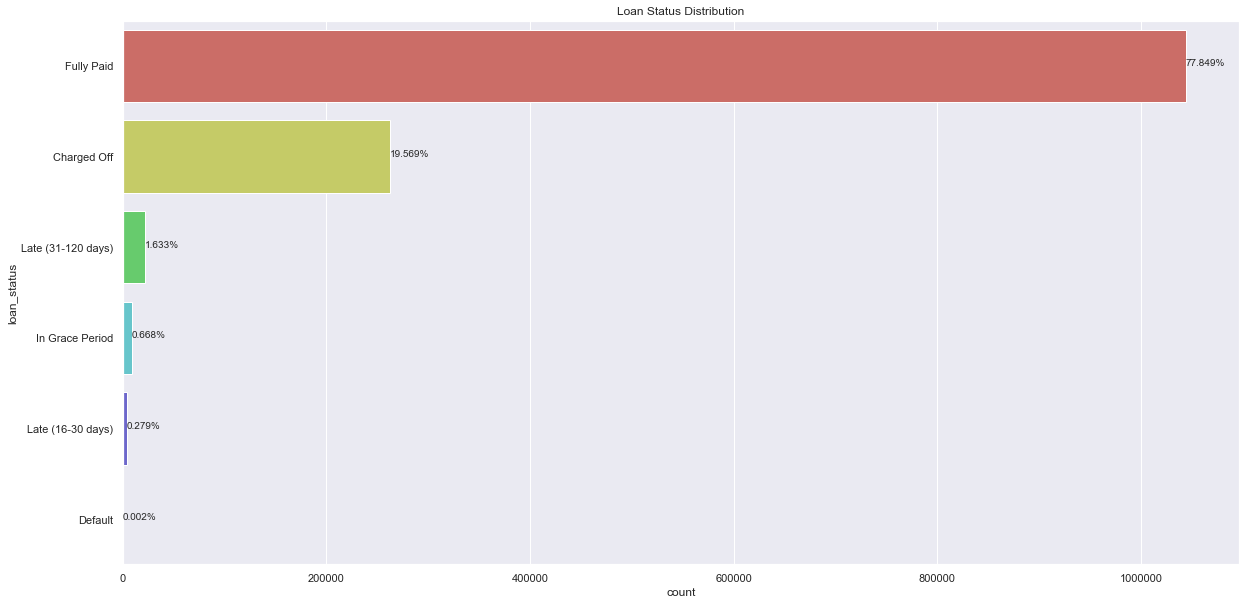

In [19]:
#Countplot of loan status
plt.figure(figsize=(20,10))
ax=sns.countplot(y='loan_status',data=loans, palette='hls',order = loans['loan_status'].value_counts().index)
plt.title('Loan Status Distribution')
total = len(loans['loan_status'])
for p in ax.patches:
        percentage = '{:.3f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

A vast majority of the loans around 78% are 'Fully Paid' which is a good sign for Lending Club's business. 'Charged Off' loans account for around 20%. All the rest of the loan statuses have minor proportions among the loan status. This also confirms that the dataset is imbalanced for the loan status.

Creating a new feature to indicate a simple classification for the loan. All Fully paid loans are classified as Good loans and all others are classified as Bad loans.

In [20]:
loans['loan_status_binary']= np.nan;
loans.loc[loans['loan_status'] == 'Fully Paid','loan_status_binary']='Good'
loans.loc[loans['loan_status'] == 'Charged Off','loan_status_binary']='Bad'
loans.loc[loans['loan_status'] == 'Default','loan_status_binary']='Bad'
loans.loc[loans['loan_status'] == 'Late (31-120 days)','loan_status_binary']='Bad'
loans.loc[loans['loan_status'] == 'In Grace Period','loan_status_binary']='Bad'
loans.loc[loans['loan_status'] == 'Late (16-30 days)','loan_status_binary']='Bad'

### How is the loan amount distributed?

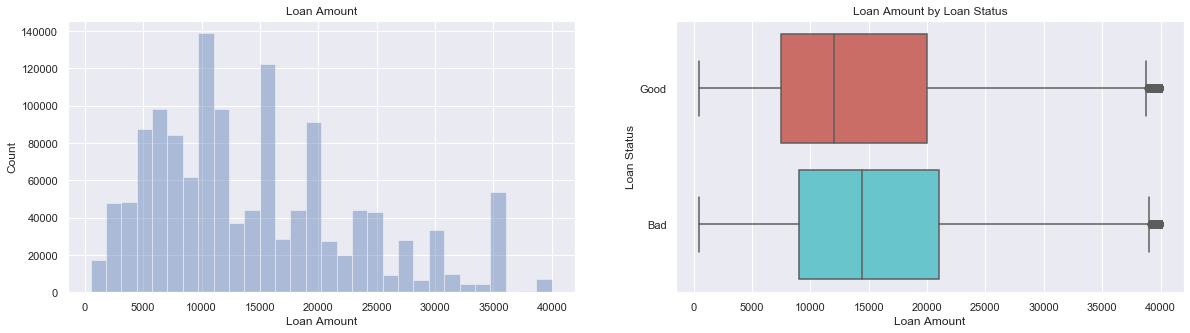

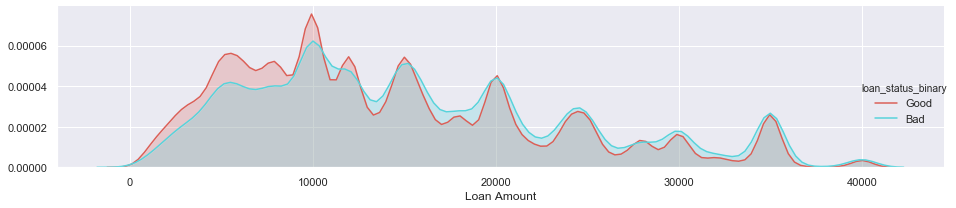

In [21]:
#histogram
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(20,5))
sns.distplot(loans.loan_amnt, kde=False, ax=ax1, bins=30)
ax1.set_xlabel('Loan Amount')
ax1.set_ylabel('Count')
ax1.set_title('Loan Amount')

#boxplot split by loan status
sns.boxplot(x='loan_amnt', y='loan_status_binary', data=loans, ax=ax2,palette="hls")
ax2.set_xlabel('Loan Amount')
ax2.set_ylabel('Loan Status')
ax2.set_title('Loan Amount by Loan Status')

#kernel density plot split by loan status
facet = sns.FacetGrid(loans, hue = 'loan_status_binary', height=3, aspect=4,palette="hls")
facet.map(sns.kdeplot, 'loan_amnt', shade=True)
facet.add_legend() 
facet.set_xlabels('Loan Amount')
plt.tight_layout() 

The distribution of loan amount is slightly skewed to the right. Most borrowers applied loan of around $10,000. 
Looks like there is a good number of values close to 40000, outside the upper limit in the box plot and thus may be outliers, but this data may be important to understand the credit risk behaviour. Let us keep it.There is almost a complete overlap with respect to the loan status and we cannot easily interpret any trends with respect to loan status with loan amount yet. Based on the box plot we can suggest that loan amounts for bad loans are generally a bit higher than good loans.

### How is the interest rate distributed?

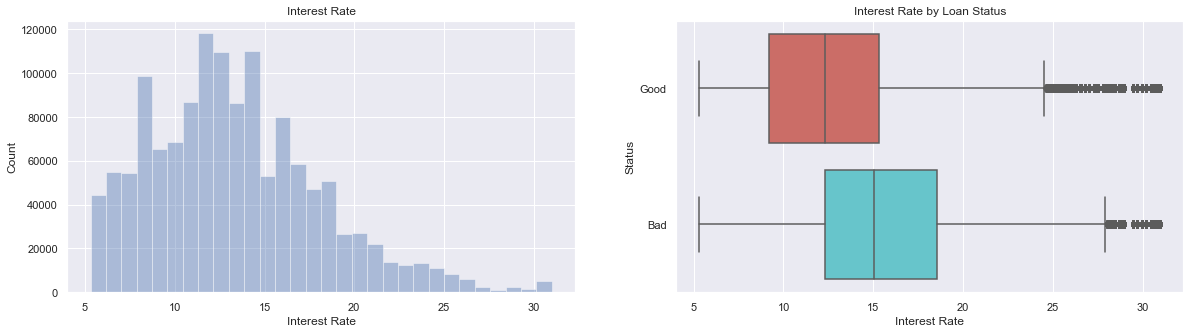

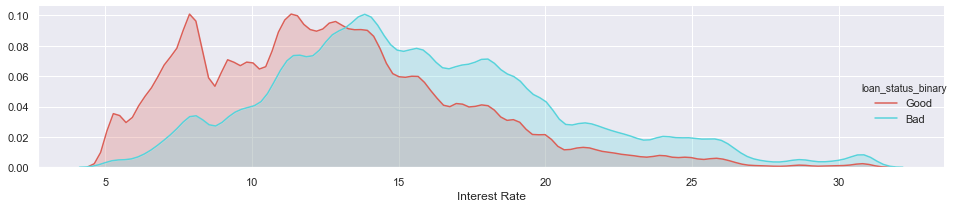

In [22]:
#histogram
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(20,5))
sns.distplot(loans.int_rate, kde=False, ax=ax1, bins=30)
ax1.set_xlabel('Interest Rate')
ax1.set_ylabel('Count')
ax1.set_title('Interest Rate')

#boxplot split by loan status
sns.boxplot(x='int_rate', y='loan_status_binary', data=loans, ax=ax2,palette="hls")
ax2.set_xlabel('Interest Rate')
ax2.set_ylabel('Status')
ax2.set_title('Interest Rate by Loan Status')

#kernel density plot split by loan status
facet = sns.FacetGrid(loans, hue = 'loan_status_binary', height=3, aspect=4,palette="hls")
facet.map(sns.kdeplot, 'int_rate', shade=True)
facet.set_xlabels('Interest Rate')
facet.add_legend() 
plt.tight_layout() 

The distribution of interest rate is also slightly skewed to the right. We have an interesting pattern here. Higher interest rates seems to be a good indicator of bad loans. We can use this information to create a new feature for binning the interest rates later. We have a large number of outliers in the interest rate above 25% for good loans and above 27% for bad loans, but this data may be important to understand the credit risk behaviour. Let us keep it.

### How is the annual income distributed?

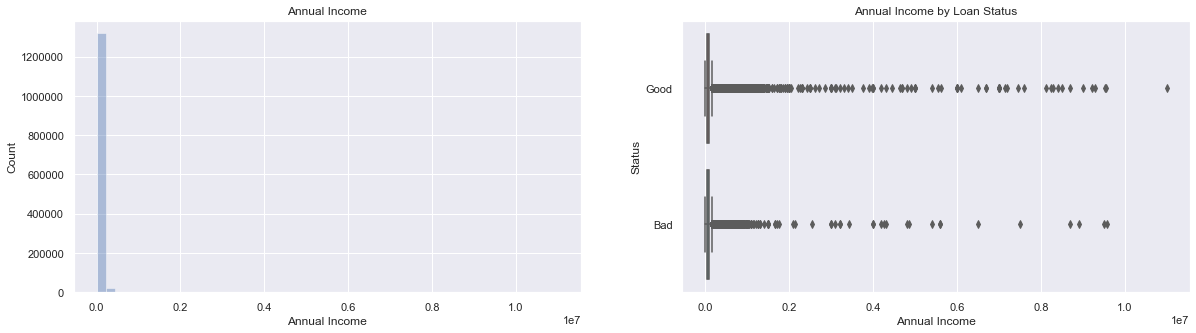

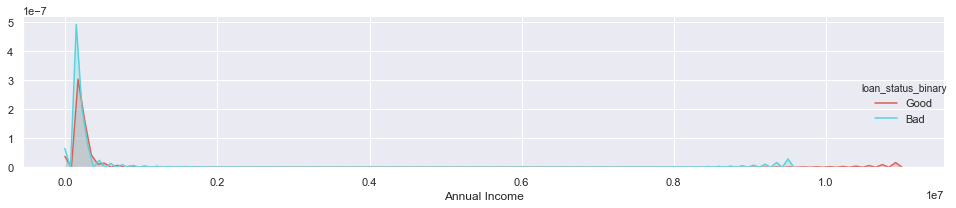

In [23]:
#histogram
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(20,5))
sns.distplot(loans.annual_inc, kde=False, ax=ax1)
ax1.set_xlabel('Annual Income')
ax1.set_ylabel('Count')
ax1.set_title('Annual Income')

#boxplot split by loan status
sns.boxplot(x='annual_inc', y='loan_status_binary', data=loans, ax=ax2,palette="hls")
ax2.set_xlabel('Annual Income')
ax2.set_ylabel('Status')
ax2.set_title('Annual Income by Loan Status')

#kernel density plot split by loan status
facet = sns.FacetGrid(loans, hue = 'loan_status_binary', height=3, aspect=4,palette="hls")
facet.map(sns.kdeplot, 'annual_inc', shade=True)
facet.set_xlabels('Annual Income')
facet.add_legend() 
plt.tight_layout() 

The annual income data is highly skewed. We may have to do a box cox transformation or log transformation. There also doesn't seem to be a clear boundary between good and bad loans.

### Viewing histograms for all numerical features

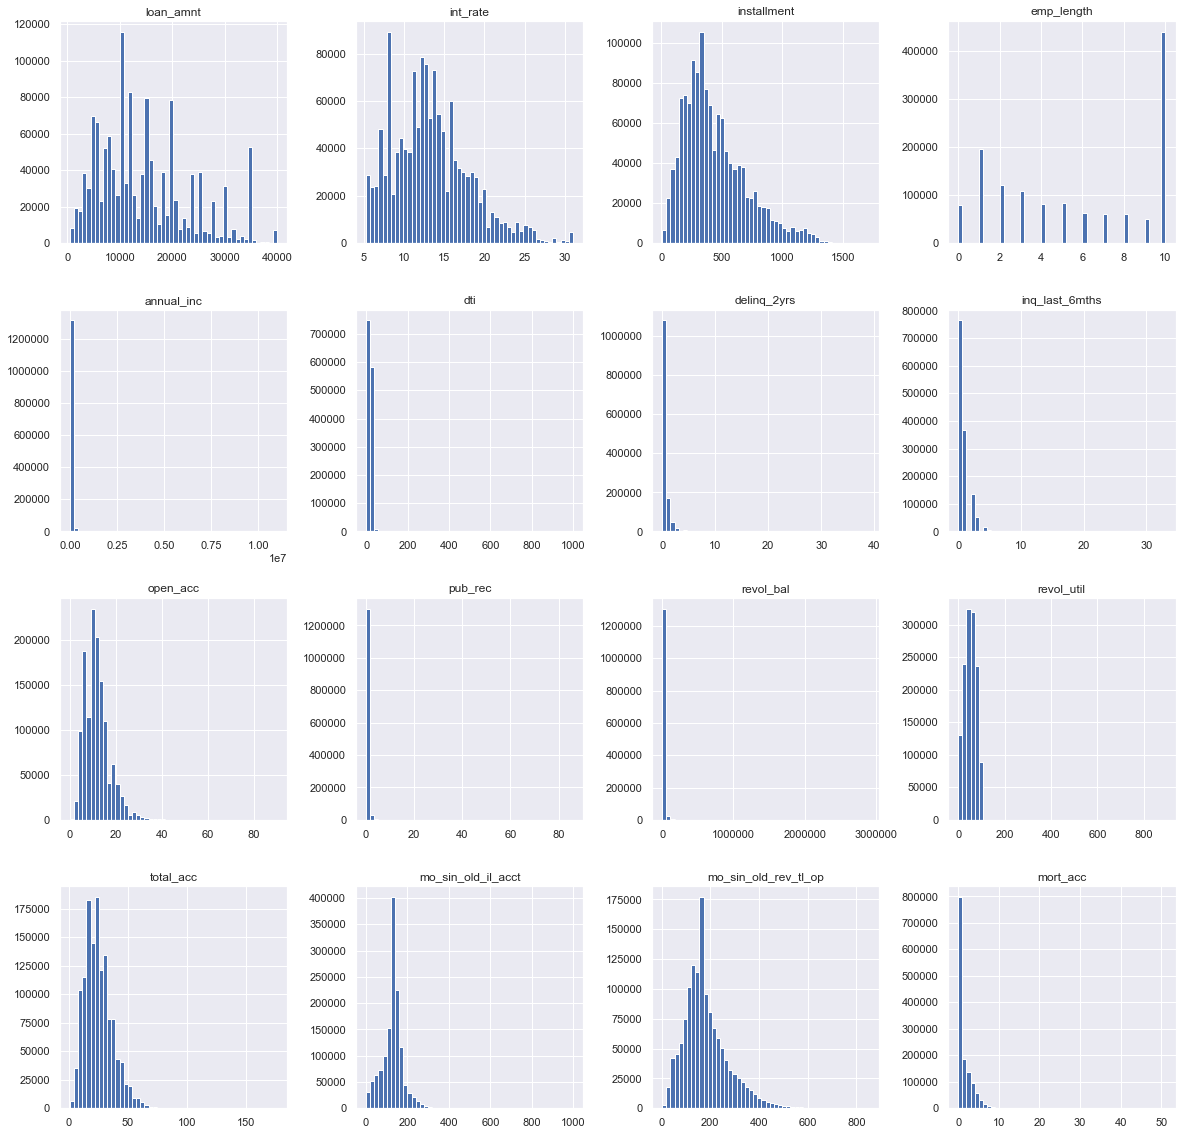

In [24]:
# Histogram for all the numeric columns
loansNumericDF=loans.select_dtypes(include='number')

# Get the number of columns
numCols=loansNumericDF.shape[1]

#histogram
fig, axisRows = plt.subplots(numCols//4, 4, figsize=(20, 20))
i = 0
for axisCols in axisRows:
    for axis in axisCols:
        if (i<numCols):
            loansNumericDF.hist(column = loansNumericDF.columns[i], bins = 50, ax=axis)
            i = i+1


### How is the loan amount distributed with respect to the loan term?

Loan Amount Distribution BoxPlot


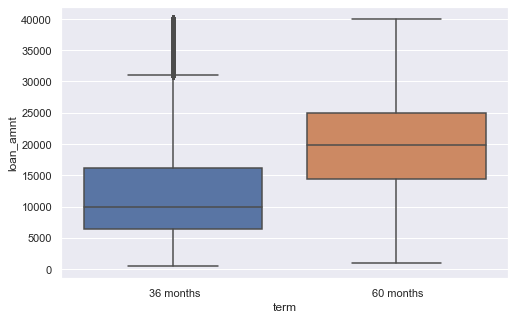

In [25]:
#boxplot split by loan status
print("Loan Amount Distribution BoxPlot")
plt.figure(figsize=(8,5))
sns.boxplot(x=loans.term, y=loans.loan_amnt)

Clearly loans with higher terms have higher amounts.There are lot of outliers with values > 30000 for the 36 months term loans.

### How is the loan purpose distributed? Are there dominant ones?

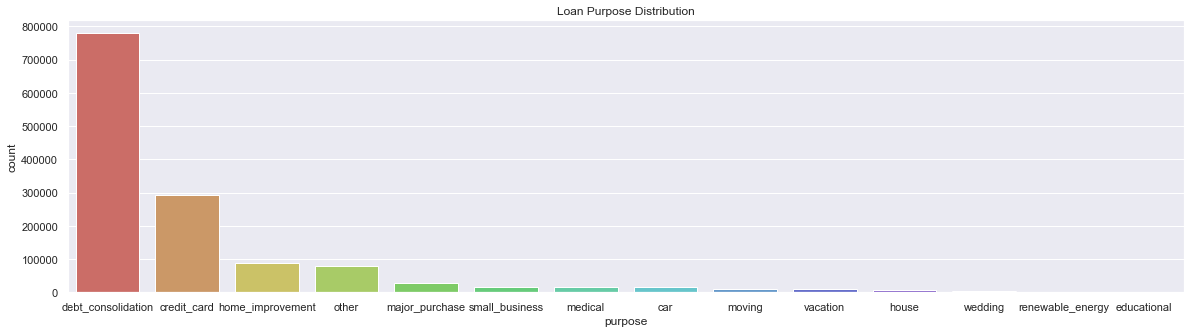

In [26]:
#countplot
plt.figure(figsize=(20,5))
sns.countplot(x='purpose',data=loans, palette='hls',order = loans['purpose'].value_counts().index)
plt.title('Loan Purpose Distribution')
plt.show()

Debt consolidation and credit card loans have an overwhelming majority of loans.
Debt consolidation loans simplifies the loan payment process when there are multiple loans for a consumer https://www.globenewswire.com/news-release/2019/10/30/1937711/0/en/Debt-Consolidation-Often-Results-in-Higher-Credit-Scores-and-Better-Credit-Performance.html It simplfies the payment process and therefore reduces credit utlization and improves the credit score. Hence that explains the popularity.
Let us find out the patterns with respect to loan status

In [27]:
#Determining the proportion of good and bad loans for each purpose
loans.groupby('purpose')['loan_status_binary'].value_counts(normalize=True)

purpose             loan_status_binary
car                 Good                  0.834126
                    Bad                   0.165874
credit_card         Good                  0.811201
                    Bad                   0.188799
debt_consolidation  Good                  0.766959
                    Bad                   0.233041
educational         Good                  0.791962
                    Bad                   0.208038
home_improvement    Good                  0.799258
                    Bad                   0.200742
house               Good                  0.750000
                    Bad                   0.250000
major_purchase      Good                  0.788811
                    Bad                   0.211189
medical             Good                  0.755570
                    Bad                   0.244430
moving              Good                  0.742109
                    Bad                   0.257891
other               Good                  0

Loans with purpose of small_business, renewable_energy and moving have the highest bad loan rates while wedding, car and home improvement have the least.

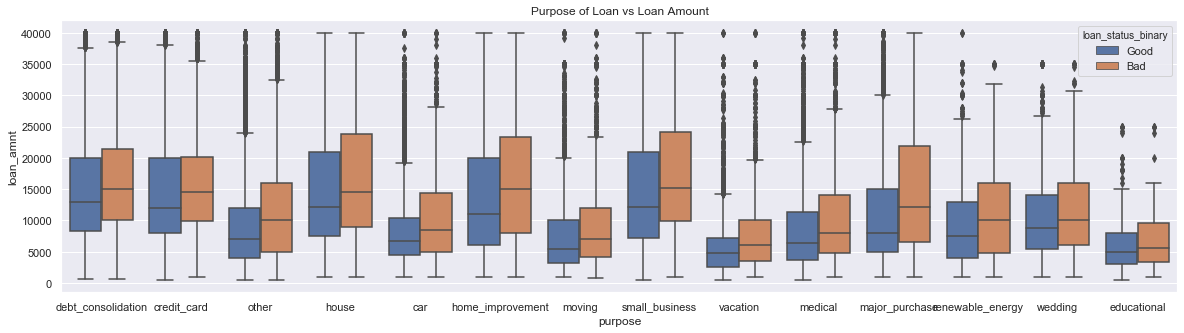

In [139]:
#boxplot of laon amount v/s purpose split by loan status
plt.figure(figsize=(20,5))
sns.boxplot(data =loans, x='purpose', y='loan_amnt', hue ='loan_status_binary')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

Analysing the trend across loan purpose, bad loans tend to have higher values compared to good loans. In addition, the loan amount taken is usually mich higher for house, home improvement and small business loans.

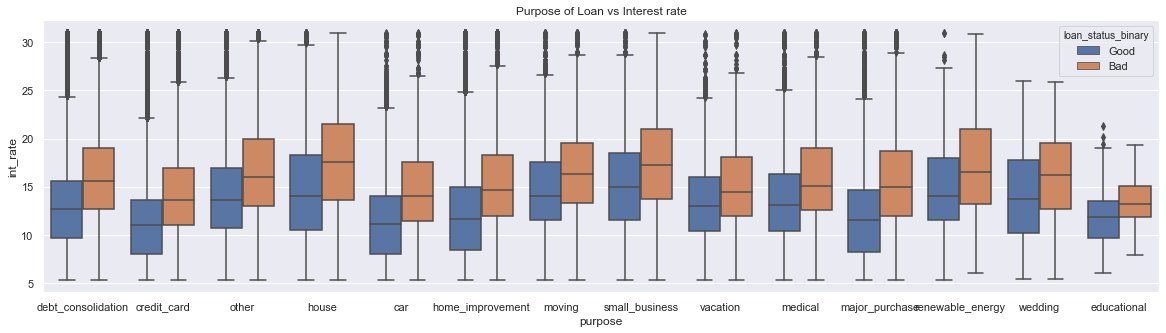

In [138]:
#boxplot of interest rate v/s purpose split by loan status
plt.figure(figsize=(20,5))
sns.boxplot(data =loans, x='purpose', y='int_rate', hue ='loan_status_binary')
plt.title('Purpose of Loan vs Interest rate')
plt.show()

Based on the previous results for bad loan rates across purposes and this box plot segmented by purpose, we can notice that higher interest rates for small business, moving and moving are compensating and thus providing an investment opportunity for risky investors and rewarding them with higher interest rates

### How is the loan grade distributed?

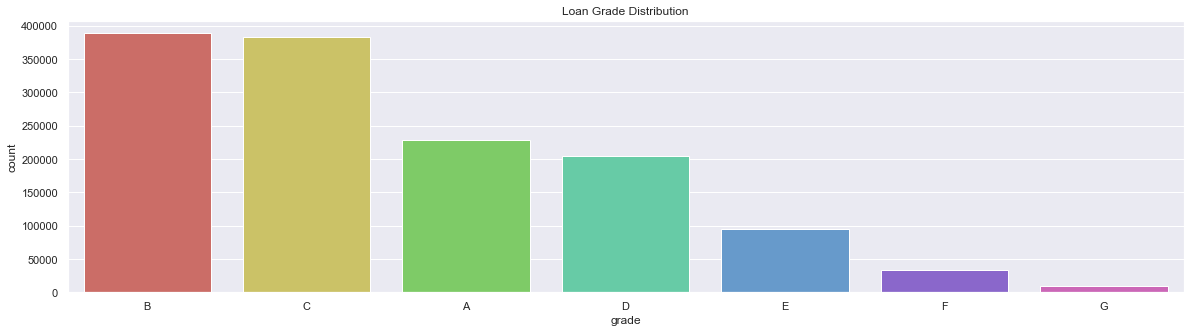

In [29]:
#barchart of loan grades
plt.figure(figsize=(20,5))
sns.countplot(x='grade',data=loans, palette='hls',order = loans['grade'].value_counts().index)
plt.title('Loan Grade Distribution')
plt.show()

B and C grade loans have a majority of loans. This also confirms that Lending Club does not approve many high risk loans - E,F,G, which makes absolute business sense. Let us drill down one more level to understand the loan status as well.

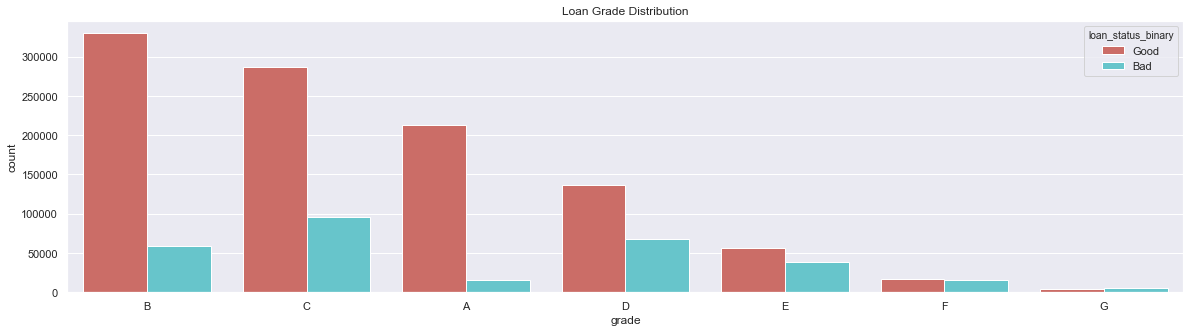

In [30]:
#barchart split by loan status
plt.figure(figsize=(20,5))
sns.countplot(x='grade',data=loans, palette='hls',hue='loan_status_binary',order = loans['grade'].value_counts().index)
plt.title('Loan Grade Distribution')
plt.show()

In [31]:
#Determining the proportion of good and bad loans for each grade
loans.groupby('grade')['loan_status_binary'].value_counts(normalize=True)

grade  loan_status_binary
A      Good                  0.929897
       Bad                   0.070103
B      Good                  0.848602
       Bad                   0.151398
C      Good                  0.750266
       Bad                   0.249734
D      Good                  0.669093
       Bad                   0.330907
E      Good                  0.592720
       Bad                   0.407280
F      Good                  0.529792
       Bad                   0.470208
G      Bad                   0.518511
       Good                  0.481489
Name: loan_status_binary, dtype: float64

The inital Loan grade calculated by Lending club https://www.lendingclub.com/foliofn/rateDetail.action almost accurately reflects the loan status of the loan in the future. The proportion of bad loans increase almost linearly as per the intially assessed loan grade ie proprotion of bad loand for Grade A < B< C < D < E < F. This also opens our eyes to the unexpected proportion of bad loans for the high graded loans - A,B,C. Thus investors should not blindly rely on loan grades while deciding whether to invest in a loan. 

### Is there any pattern for interest rates across loan grades?

Text(0.5, 1.0, 'Lending Club Loan - Interest Rate Distribution by Grade')

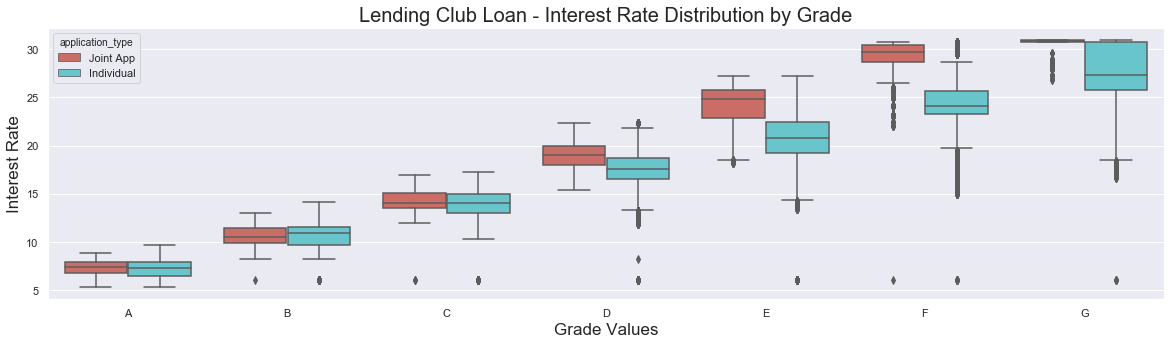

In [32]:
#boxplot of interest rate v/s grade split by loan status
plt.figure(figsize=(20,5))
g1 = sns.boxplot(x='grade', y="int_rate",data=loans, 
               hue="application_type", palette = "hls",  
               order=["A",'B','C','D','E','F', 'G'])
g1.set_xlabel("Grade Values", fontsize=17)
g1.set_ylabel("Interest Rate", fontsize=17)
g1.set_title("Lending Club Loan - Interest Rate Distribution by Grade", fontsize=20)

We can observe that the interest rates seem to increase as the loan grade moves from A to G which is logical as the risk on the loan increases as the grade does. An interesting observation is that the interest rates are higher for join applicants. Does this have any rationale with respect to loan defaults? Let us find out.

In [33]:
#Determining the proportion of good and bad loans for each application type
loans.groupby('application_type')['loan_status_binary'].value_counts(normalize=True)

application_type  loan_status_binary
Individual        Good                  0.781125
                  Bad                   0.218875
Joint App         Good                  0.650154
                  Bad                   0.349846
Name: loan_status_binary, dtype: float64

There is clearly a higher proportion of Bad Loans for Joint applicants hence the higher interest rates seem justified as there is higher chance of default.

### Are there any patterns on loans with respect to employment length?

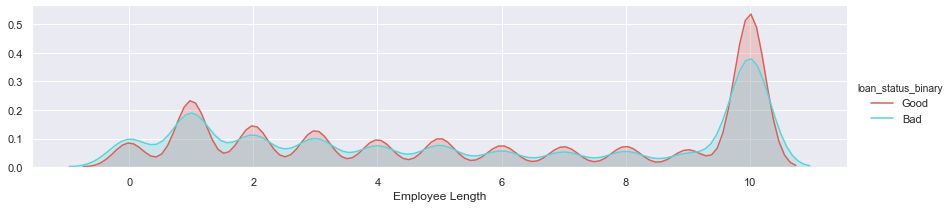

In [34]:
#kde plot to understand the proportion of loans based on employment length split according to loan status
facet = sns.FacetGrid(loans, hue = 'loan_status_binary', height=3, aspect=4,palette="hls")
facet.map(sns.kdeplot, 'emp_length', shade=True)
facet.add_legend() 
facet.set_xlabels('Employee Length')

Even though the loan status proportion is almost evenly distributed across employee length, we notice that there is a relative peak of bad loans for employee length around <1 year. Lower employee length may be a reasonable indicator for bad loans as the individual has just started working and must be credit short.Our findings suggest that most loans were applied by people with more than 10 years of work years and in the start of their career with <2 years of work years. This may suggest that loans are taken to satisfy different goals in life which tend to happen in phases ie early stage of career and around 10 years into career.

### Are there any patterns on loans with respect to home ownership?

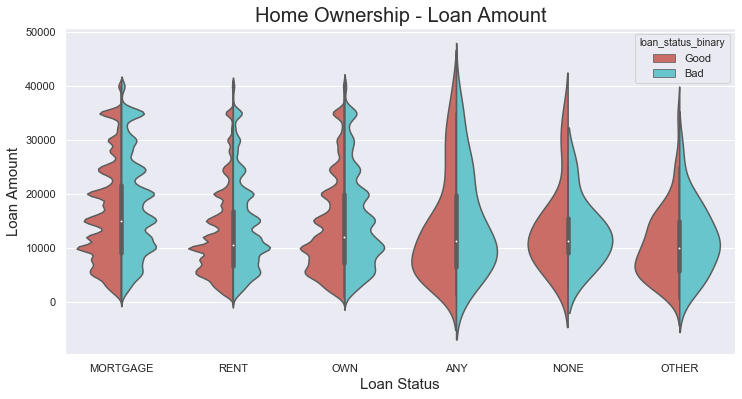

In [35]:
#violinplot for loan amount v/s home ownership split by loan status
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="home_ownership",y="loan_amnt",data=loans, hue="loan_status_binary", split=True,palette='hls')
plt.title("Home Ownership - Loan Amount", fontsize=20)
plt.xlabel("Loan Status", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

Throught the violin plot we can observe that distribution of loan amount across home ownership types is different. Users with mortgages tend to apply for higher loan amounts.

In [136]:
#Determining the proportion of good and bad loans for each home ownership type
loans.groupby('home_ownership')['loan_status_binary'].value_counts(normalize=True)

home_ownership  loan_status_binary
ANY             Good                  0.741379
                Bad                   0.258621
MORTGAGE        Good                  0.807699
                Bad                   0.192301
NONE            Good                  0.849057
                Bad                   0.150943
OTHER           Good                  0.791209
                Bad                   0.208791
OWN             Good                  0.768918
                Bad                   0.231082
RENT            Good                  0.744888
                Bad                   0.255112
Name: loan_status_binary, dtype: float64

Home ownership 'any' and 'rent' has the highest loan default rates of around 25%. Thus Lending Club should be wary about such borrowers.

### Does a high delinquency history imply a bad loan?

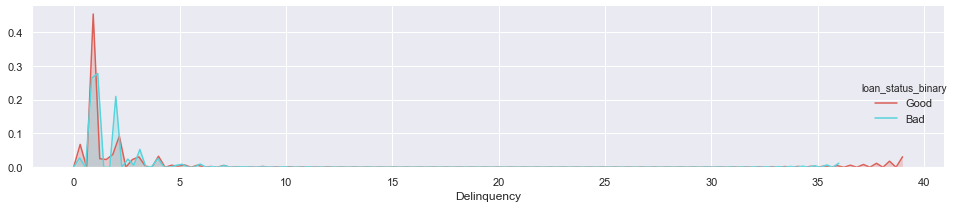

In [149]:
#kde plot to understand the proportion of loans based on delinquency history split according to loan status
facet = sns.FacetGrid(loans, hue = 'loan_status_binary', height=3, aspect=4,palette="hls")
facet.map(sns.kdeplot, 'delinq_2yrs', shade=True)
facet.add_legend() 
facet.set_xlabels('Delinquency')
plt.tight_layout() 

We can identify that there is spike in bad loans for users with 2 delinquencies in tha past years, but there are good loans where there were more than 35 delinquencies. Hence we cannot make a generalised statement that a user with a history of delinquencies will have a bad loan.

### How are the loan volumes distributed geographically?

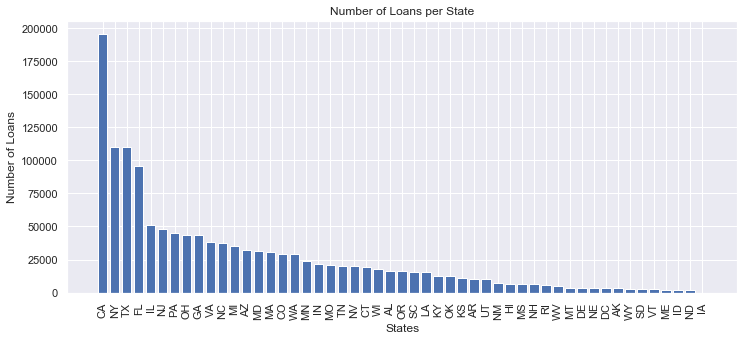

In [36]:
# Distribution of loan volume by state
plt.figure(num=1, figsize=(12,5))
plt.bar(x=loans.addr_state.value_counts().index, 
        height=loans.addr_state.value_counts().values)
plt.xlabel('States')
plt.ylabel('Number of Loans')
plt.title('Number of Loans per State')
plt.xticks(rotation=90);

We can observe that majority of the loans were in California, New York and Texas.

### Has there been any pattern over the years with respect to loans?

In [37]:
#First we would need to extract the year from the date
dt_series = pd.to_datetime(loans['issue_d'])
loans['year'] = dt_series.dt.year

Text(0, 0.5, 'Average loan amount issued')

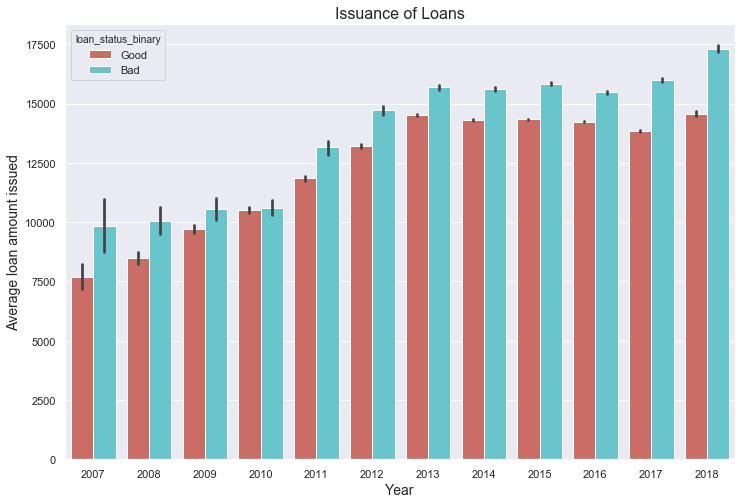

In [38]:
#barchart of average loan amount issued each year
plt.figure(figsize=(12,8))
sns.barplot('year', 'loan_amnt', data=loans, palette='hls',hue='loan_status_binary')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

There was a gradual increase in average loant amount issued from 2007 to 2013 with a stabilisation for the next 4 years. In 2018, there was a rise.

In [39]:
#Dropping temporarily created column
loans.drop(columns='year', inplace=True);

### What is the most common employment for loan applicants?

There are 378734 unique titles as the employee titles are not standardised. Exploring the most common titles using the word cloud python library.

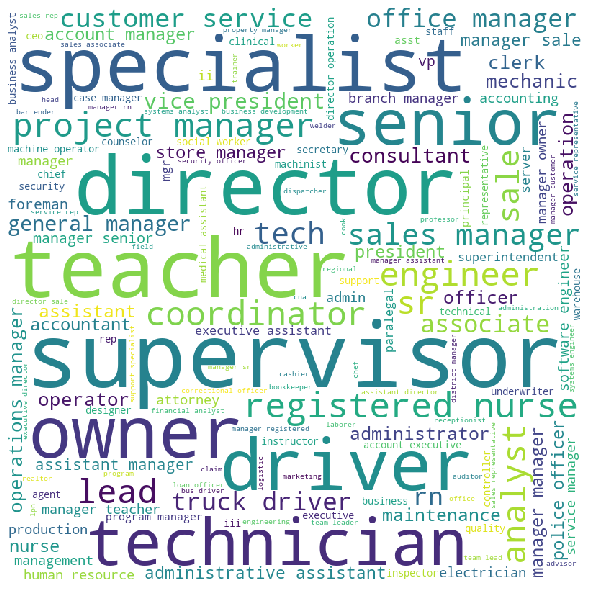

In [39]:
comment_words=' ';
for val in loans[loans.emp_title.notnull()].emp_title[1:100000]: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Based on the wordcloud- supervisors, directors, technicians, specialists, teachers and drivers are the most common employee titles for loan applicants.

## What are the key indicators of a bad loan?

My objective here is to determine what may be the key indicators of a Bad Loan. 

Based on credit risk literature and our analysis so far these may be suitable candidates :
low annual income, high debt to income ratio, high interest rates, low grade, application type,
loan purpose, employment length, previous history of delinquencies in payment

To perform bivariate analysis using scatter plot for this dataset, it will cause overplotting. Sampling is a technique to overcome this situation.

In [ ]:
#Let us first sample the data
import random
delta_sample= loans.sample(n=1000, random_state=100)

<Figure size 1440x360 with 0 Axes>

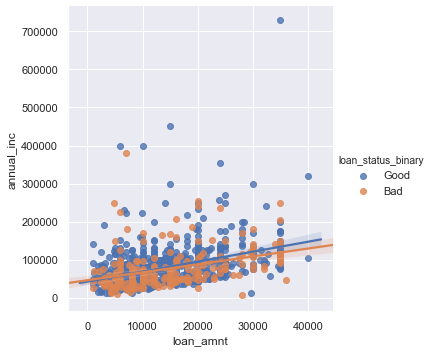

In [94]:
#lmplot() can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset and allows to fit a third variable. Here we will use the hue to represent the loan status.plt.figure(figsize=(20,5))
sns.lmplot(x="loan_amnt", y="annual_inc",data=delta_sample, hue="loan_status_binary")

There appears to be a linear relationship between annual income and loan amount.

<Figure size 1440x360 with 0 Axes>

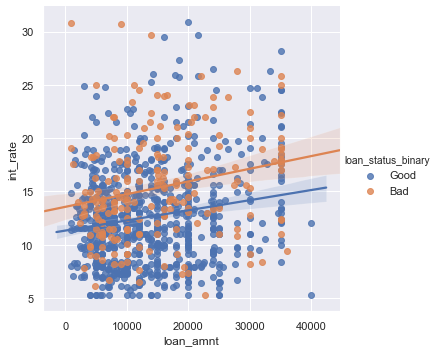

In [95]:
plt.figure(figsize=(20,5))
sns.lmplot(x="loan_amnt", y="int_rate",data=delta_sample, hue="loan_status_binary")

There doesnt appear to be any linear relationship between the loan amount and the interest rates on the loans as we have observations all around.

<Figure size 1440x360 with 0 Axes>

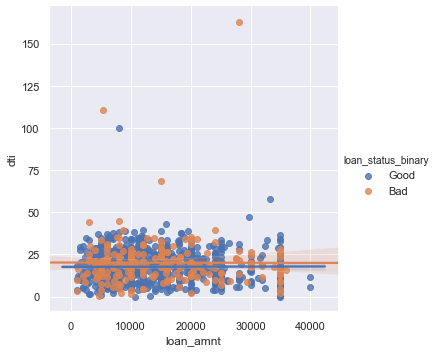

In [96]:
plt.figure(figsize=(20,5))
sns.lmplot(x="loan_amnt", y="dti",data=delta_sample, hue="loan_status_binary")

Based on the inital pairplots between key loan variables, we can see that we have a complex problem at hand in trying to determine the best estimators to classify a loan as bad or good.

Annual income appears to be a good indicator of bad loans as we can see all the bad loans are bunched together at low income level but loan amounts or interest rates doesnt seem to be very good  indicators as we have points all over the plot. Looks like scatterplot or pairplot is not a good tool for our data analysis for this problem.

## Outlier Detection

Based on our exploratory data analysis using univariate, bivariate and other techniques we have noticed that the datset has some outliers which may distort our results of the study.

Mahalanobis distance is an effective multivariate distance metric that measures the distance between a point and a distribution.Let us try using it to determine the outliers in our dataset.

In [41]:
# Mahalanobis distance for outlier identification
from scipy.spatial.distance import cdist
outlierCols = ['loan_amnt','emp_length','int_rate', 'annual_inc','dti','revol_util','pub_rec','delinq_2yrs','inq_last_6mths']

meanV = loans[outlierCols].mean().values.reshape(1, len(outlierCols))

# Computing the Mahalanobis distance from each row to the mean vector
outlierScore = cdist(loans[outlierCols], meanV, metric='mahalanobis').flatten()

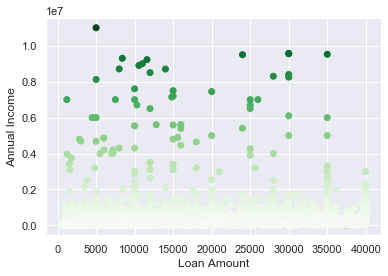

In [98]:
#scatter plot of loan amount v/s annual income with hue varying with outlier score
plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')
plt.scatter(loans.loan_amnt, loans.annual_inc , c = outlierScore, cmap = plt.cm.Greens)

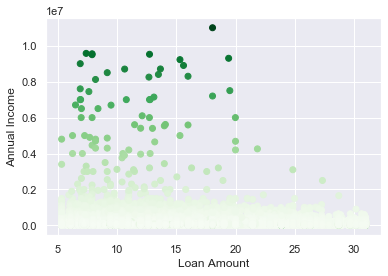

In [99]:
#scatter plot of interest rate v/s annual income with hue varying with outlier score
plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')
plt.scatter(loans.int_rate, loans.annual_inc , c = outlierScore, cmap = plt.cm.Greens)

Here we have visualized few of our outlier with respect to some of the features, but since we have around 30 features we may not be able to view them visually in a plot.Based on chi square distribution table critical value for 9 degrees of freedom at a critical alpha of .001 is 27.88 https://en.wikiversity.org/wiki/Mahalanobis%27_distance

In [100]:
#Let us check the number of rows with mahalonabis distance greater than critical value
loans.loc[outlierScore>27.88, :].loan_status.value_counts()

Fully Paid            196
Charged Off            58
Late (31-120 days)     14
Late (16-30 days)       3
In Grace Period         3
Name: loan_status, dtype: int64

Around 25% of the outlier are bad loans, but looks like a negligible number compared to the whole dataset so we can remove it.

In [42]:
#Removing outliers
loans.loc[outlierScore<=27.88, :]
loans.reset_index(drop=True, inplace=True)
print('The cleaned Channels dataset has a shape of :', loans.shape)

The cleaned Channels dataset has a shape of : (1340973, 29)


The best way to handle outliers would be to observe their impact after modelling the data analysis problem and testing where we can compare the results before and after removing outliers and decide whether to keep them or not. But here we would be following a simplistic approach of removing them as we have a huge volume of records.

## Feature Engineering

Credit line age  -Based on domain knowledge a longer credit line age is a sign of better credit management

In [43]:
#Converting to dat time format
loans['earliest_cr_line'] = pd.to_datetime(loans['earliest_cr_line'], infer_datetime_format=True)
#Extracting month
loans['credit_history_age']=(pd.to_datetime('today')-loans['earliest_cr_line'])/np.timedelta64(1,'M')

In [44]:
# Filling for null values in earliest_cr_line
loans.credit_history_age = loans.credit_history_age.fillna(value=loans.delinq_2yrs.median())

In [45]:
#dropping date column
loans.drop(columns='earliest_cr_line', inplace=True);

Loan Amount to Annual Income ratio

In [46]:
loans['loan_income_ratio'] = np.nan
loans['loan_income_ratio']=loans['loan_amnt']/loans['annual_inc']

Annual Income Binning
After trying different combinations of bins - <20000, 20000-100000, >100000 gave the highest proportion of bad loans in each bucket

In [47]:
loans['income_category'] = np.nan
lst = [loans]

for col in lst:
    col.loc[col['annual_inc'] <= 20000, 'income_category'] = 'Low'
    col.loc[(col['annual_inc'] > 20000) & (col['annual_inc'] <= 100000), 'income_category'] = 'Medium'
    col.loc[col['annual_inc'] > 100000, 'income_category'] = 'High'

Loan Amount Binning
After trying different combinations of bins - <10000, 10000-20000, >20000 gave the highest proportion of bad loans in each bucket

In [48]:
loans['loan_amount_category'] = np.nan
lst = [loans]

for col in lst:
    col.loc[col['loan_amnt'] <= 10000, 'loan_amount_category'] = 'Low'
    col.loc[(col['loan_amnt'] > 10000) & (col['loan_amnt'] <= 20000), 'loan_amount_category'] = 'Medium'
    col.loc[col['loan_amnt'] > 20000, 'loan_amount_category'] = 'High'

After trying different combinations of bins - <10, 10-16, >16 gave the highest proportion of bad loans in each bucket

In [49]:
loans['interest_rate_category'] = np.nan
lst = [loans]

for col in lst:
    col.loc[col['int_rate'] <= 10, 'interest_rate_category'] = 'Low'
    col.loc[(col['int_rate'] > 10) & (col['int_rate'] <= 16), 'interest_rate_category'] = 'Medium'
    col.loc[col['int_rate'] > 16, 'interest_rate_category'] = 'High'

## Multi variate analysis using correlations

Correlation Analysis is an important preliminary step to Regression Analysis.Bivariate analysis using pearson correlation assumes normal distribution of data, linearity and homoscedasity. Kendall’s rank correlation and spearman rank correlation are other alternatives which are non-parametric and does not make assumptions on the distribution. Let us try both paramatric and non parametric methods and contrast.

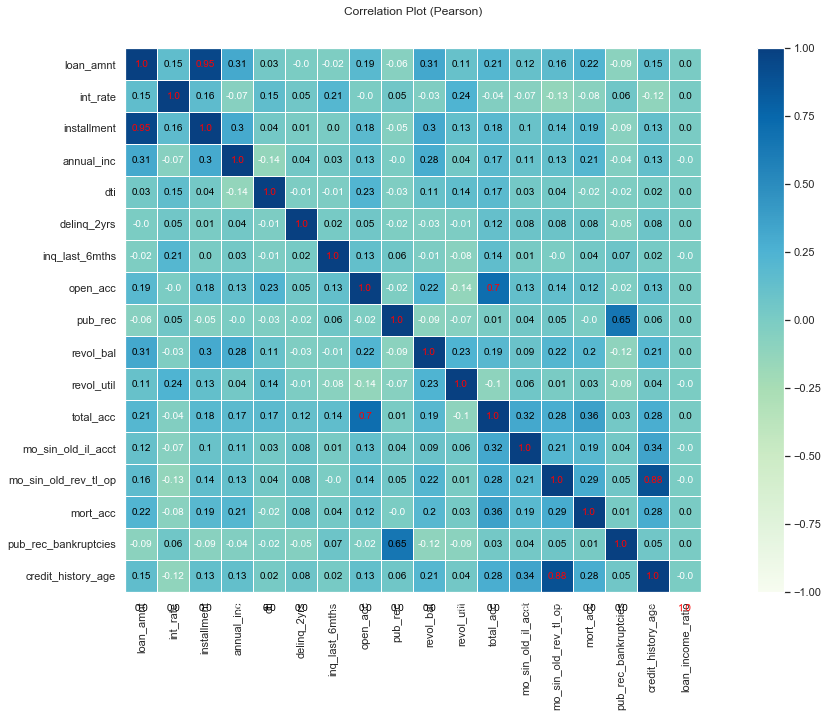

In [55]:
#Firstly correlation using pearson's correlation
# Calculating pearson correlation matrix
numCols = loans.select_dtypes(include=['float64', 'int64']).columns
corrMat = loans[numCols].corr(method='pearson') # PEARSON

plt.figure(figsize=(20,10))
plt.matshow(corrMat, fignum=False, vmin=-1, vmax=1, cmap='GnBu')

# Text annotation
for i in range(len(numCols)):
    for j in range(len(numCols)):
        if corrMat.iloc[i, j] < 0:
            plt.text(i, j, round(corrMat.iloc[i, j], 2), ha="center", va="center", color="w")
        elif corrMat.iloc[i, j] > 0.7:
            plt.text(i, j, round(corrMat.iloc[i, j], 2), ha="center", va="center", color="red")
        else:
            plt.text(i, j, round(corrMat.iloc[i, j], 2), ha="center", va="center", color="black")           

plt.xticks(range(len(numCols)), numCols, rotation=90)
plt.yticks(range(len(numCols)), numCols)
plt.tick_params(axis='x', labelbottom=True, labeltop=False, top=False, bottom=False)

ax = plt.gca()
ax.set_xticks(np.arange(len(numCols))-.5, minor=True)
ax.set_yticks(np.arange(len(numCols))-.5, minor=True)

plt.tick_params(axis='x', which='both', labelbottom=True, labeltop=False, top=False, bottom=False)

plt.grid(which='minor', color='w', linestyle='-', linewidth=1)
plt.grid(False)
plt.title('Correlation Plot (Pearson)')
plt.colorbar();

We have high collinearity between:
1. loan_amnt and installment 
2. total_acc and open_acc
3. credit_history_age and mo_sin_old_rev_tl_op

Next on trying correlation using spearman's correlation, the kernel was running continously for more than a couple of hours without any results. This would mostly likely as a result of the huge dataset and limited hardware capabilities on my laptop. So I resorted to taking a sample from the dataset and plotting the spearman correlation.

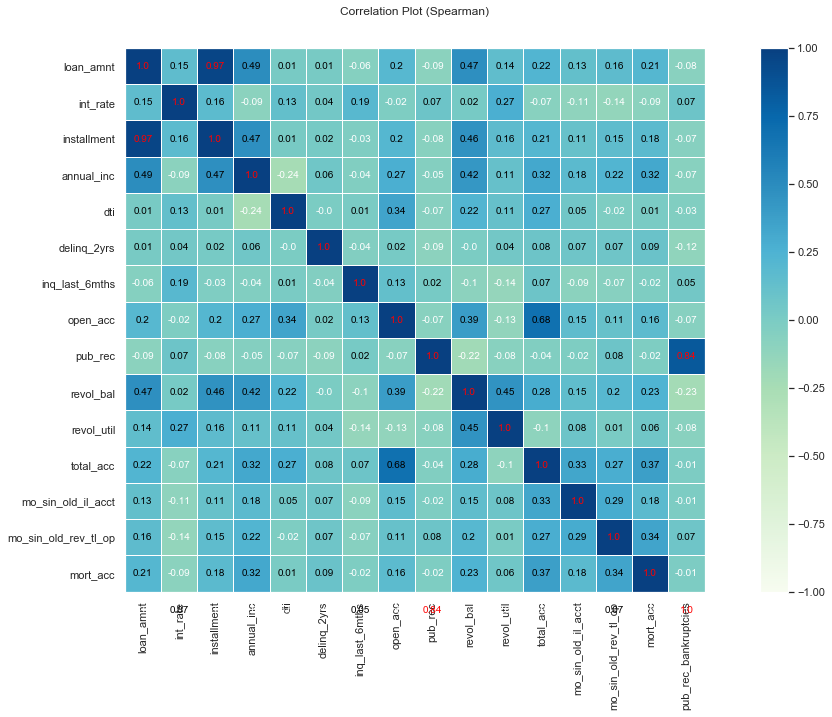

In [56]:
# Calculating spearman correlation matrix
numCols = delta_sample.select_dtypes(include=['float64', 'int64']).columns
corrMat = delta_sample[numCols].corr(method='spearman')

plt.figure(figsize=(20,10))
plt.matshow(corrMat, fignum=False, vmin=-1, vmax=1, cmap='GnBu')

# Text annotation
for i in range(len(numCols)):
    for j in range(len(numCols)):
        if corrMat.iloc[i, j] < 0:
            plt.text(i, j, round(corrMat.iloc[i, j], 2), ha="center", va="center", color="w")
        elif corrMat.iloc[i, j] > 0.7:
            plt.text(i, j, round(corrMat.iloc[i, j], 2), ha="center", va="center", color="red")
        else:
            plt.text(i, j, round(corrMat.iloc[i, j], 2), ha="center", va="center", color="black")           

plt.xticks(range(len(numCols)), numCols, rotation=90)
plt.yticks(range(len(numCols)), numCols)
plt.tick_params(axis='x', labelbottom=True, labeltop=False, top=False, bottom=False)

ax = plt.gca()
ax.set_xticks(np.arange(len(numCols))-.5, minor=True)
ax.set_yticks(np.arange(len(numCols))-.5, minor=True)

plt.tick_params(axis='x', which='both', labelbottom=True, labeltop=False, top=False, bottom=False)

plt.grid(which='minor', color='w', linestyle='-', linewidth=1)
plt.grid(False)
plt.title('Correlation Plot (Spearman)')
plt.colorbar();


We have simlar results with high collinearity between:
1. loan_amnt and installment 
2. total_acc and open_acc ie total accounts and total number of open accounts
3. credit_history_age and mo_sin_old_rev_tl_op ie credit history age and months since oldest revolving account opened

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

.00-.19 “very weak”
.20-.39 “weak”
.40-.59 “moderate”
.60-.79 “strong”
.80-1.0 “very strong”

We have learnt that loan amount is moderately positively correlated with annual income- which confirms our hypothesis based on the scatter plot earlier. In additon the revolving balance also has a moderate association with loan amount. 
Debt to income ratio is negatively moderately associated with annual income. We can make more such observations from the correlation matrix.

In [50]:
#Dropping highly collinear features
loans.drop(columns='installment', inplace=True);
loans.drop(columns='open_acc', inplace=True);
loans.drop(columns='mo_sin_old_rev_tl_op', inplace=True);

## Feature Transformation

During our exploratory data analysis phase we noticed that the following variables were skewed- loan amount, interest rate and annual income.

Viewing the QQ plot for these variables. A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight and can say it is normally distributed.https://data.library.virginia.edu/understanding-q-q-plots/

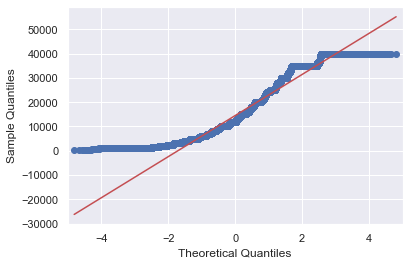

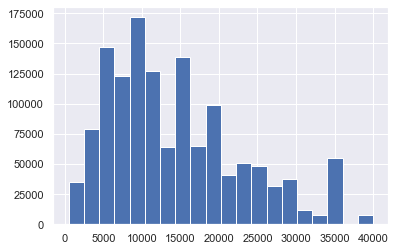

In [184]:
#QQ plot for loan amount
sm.qqplot(loans['loan_amnt'], dist=stats.norm, line = 'r')
plt.show()

#Histogram for loan amount
ax2 = plt.hist(loans['loan_amnt'],20)
plt.show()

Viewing the distribution after log transform of loan amount, interest rate and annual income.

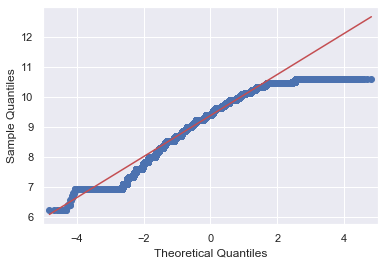

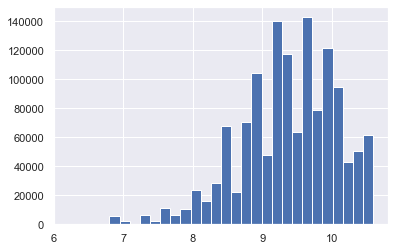

In [196]:
#QQ plot for loan amount after log transformation
sm.qqplot(np.log(loans['loan_amnt']), dist=stats.norm, line = 'r')
plt.show()

#Histogram for loan amount after log transformation
ax2 = plt.hist(np.log(loans['loan_amnt']),30)
plt.show()

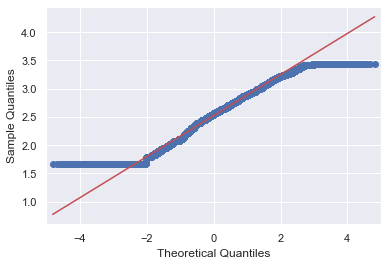

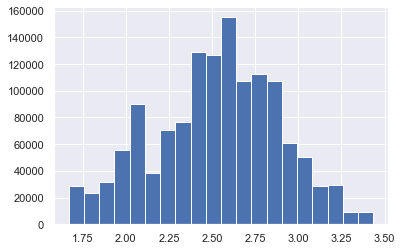

In [187]:
#QQ plot for interest rate after log transformation
sm.qqplot(np.log(loans['int_rate']), dist=stats.norm, line = 'r')
plt.show()

#Histogram for interest rate after log transformation
ax2 = plt.hist(np.log(loans['int_rate']),20)
plt.show()

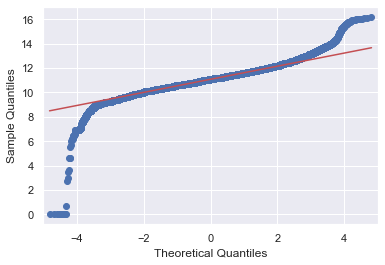

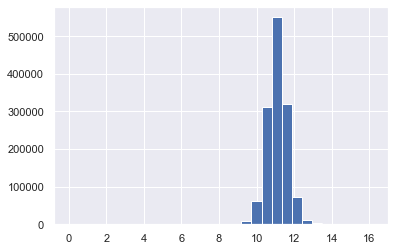

In [192]:
#QQ plot for annual income after log transformation
sm.qqplot(np.log(loans['annual_inc']), dist=stats.norm, line = 'r')
plt.show()

#Histogram for annual income after log transformation
ax2 = plt.hist(np.log(loans['annual_inc']),30)
plt.show()

After the log transformation we can observe that loan amount, interest rate and annual income now follows a normal distribution.

Let us create new features for the log transformed values as log transformation reduces variablity https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/

In [51]:
loans['log_loan_amnt']=np.log(loans['loan_amnt'])
loans['log_int_rate']=np.log(loans['int_rate'])
loans['log_annual_inc']=np.log(loans['annual_inc'])

## Feature Encoding- Categorical

Some algorithms can work with categorical data directly. For example, a decision tree can be learned directly from categorical data with no data transform required (this depends on the specific implementation). Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric. There are multiple methods, the two main types are:
    1. One hot encoding
    2. Label encoding

Problem with label encoding is that it assumes higher the categorical value, better the category. The model’s prediction may be inaccurate. This is why we would be majorly using one hot encoder to perform “binarization” of the category and include it as a feature to train the model. 

In [111]:
#Examining the object data types
loans.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'emp_title', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'application_type',
       'loan_status_binary', 'income_category', 'loan_amount_category',
       'interest_rate_category'],
      dtype='object')

In [52]:
#We do not need emp_title, issue_d, addr_state anymore for the feature selection
loans.drop(columns='emp_title', inplace=True);
loans.drop(columns='issue_d', inplace=True);
loans.drop(columns='addr_state', inplace=True);

Label encoding for loan status

In [53]:
loan_status= loans['loan_status']
loan_status_binary=loans['loan_status_binary'].map({'Good': 0,'Bad':1});
loans_features= loans.drop(columns='loan_status');
loans_features.drop(columns='loan_status_binary', inplace=True);

One hot encoding for all other categorical features

In [54]:
loans_features=pd.get_dummies(loans_features);

Viewing all the features

In [55]:
loans_features.columns

Index(['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mo_sin_old_il_acct', 'mort_acc', 'pub_rec_bankruptcies',
       'credit_history_age', 'loan_income_ratio', 'log_loan_amnt',
       'log_int_rate', 'log_annual_inc', 'term_ 36 months', 'term_ 60 months',
       'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',
       'grade_G', 'home_ownership_ANY', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy',

Creating Multiple dataset combination for features

In [56]:
#Creating dataset with only binned values for annual income, loan amount and interest rate
loans_features_with_binned=loans_features.drop(columns=['loan_amnt','int_rate','annual_inc','log_loan_amnt', 'log_int_rate', 'log_annual_inc'])

In [57]:
#Creating dataset with logs for annual income, loan amount and interest rate
loans_features_with_logs= loans_features.drop(columns=['loan_amnt','int_rate','annual_inc','income_category_High',        'income_category_Low', 'income_category_Medium',
       'loan_amount_category_High', 'loan_amount_category_Low','loan_amount_category_Medium', 'interest_rate_category_High',
       'interest_rate_category_Low', 'interest_rate_category_Medium'])

In [292]:
#Creating dataset without binned values and logs for annual income, loan amount and interest rate
loans_features_with_original=loans_features.drop(columns=['income_category_High',
       'income_category_Low', 'income_category_Medium',
       'loan_amount_category_High', 'loan_amount_category_Low',
       'loan_amount_category_Medium', 'interest_rate_category_High',
       'interest_rate_category_Low', 'interest_rate_category_Medium','log_loan_amnt', 'log_int_rate', 'log_annual_inc'])

## Preparation for modelling
Modeling can be used to understand the feature relationship as well as prediction. Our focus will be on feature association and feature importance to determine the best features for selection, contributing to out understanding of the loan status.

### Stratified Split of Data to maintain balance of target class

We will also create 2 seperate datasets- with difference in how loan amount, annual income and interest rate is handled. 

In [59]:
# Splitting train 75% and test 25% data stratified based on target class
#dataset with binned values
X1_train, X1_test, y1_train, y1_test = train_test_split(loans_features_with_binned, loan_status_binary, random_state = 101,stratify=loan_status_binary) 
#X2_train, X2_test, y2_train, y2_test = train_test_split(loans_features_with_original, loan_status_binary, random_state = 101,stratify=loan_status_binary)

#dataset with log transformed values
X3_train, X3_test, y3_train, y3_test = train_test_split(loans_features_with_logs, loan_status_binary, random_state = 101,stratify=loan_status_binary) 

#Sample data for inital cross valdiation for models
X4_train, X4_test, y4_train, y4_test = train_test_split(loans_features_with_logs, loan_status_binary, random_state = 101,stratify=loan_status_binary,train_size=0.01) 

### Feature Scaling

Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale and/or close to normally distributed. Feature scaling needs to be done after the train and test split to prevent any data leakage.

We will be using StandardScaler as it standardizes a feature by subtracting the mean and then scaling to unit variance. 
StandardScaler results in a distribution with a standard deviation equal to 1 and mean 0.

In [60]:
scaler = preprocessing.StandardScaler();
scaled_X1_train = scaler.fit_transform(X1_train);
scaled_X1_test = scaler.fit_transform(X1_test);

scaled_X3_train = scaler.fit_transform(X3_train);
scaled_X3_test = scaler.fit_transform(X3_test);

scaled_X4_train = scaler.fit_transform(X4_train);
scaled_X4_test = scaler.fit_transform(X4_test);

In [61]:
scaled_X1_train_pd=pd.DataFrame(scaled_X1_train)
scaled_X1_train_pd.columns = X1_train.columns
scaled_X3_train_pd=pd.DataFrame(scaled_X3_train)
scaled_X3_train_pd.columns = X3_train.columns
scaled_X4_train_pd=pd.DataFrame(scaled_X4_train)
scaled_X4_train_pd.columns = X4_train.columns

In [100]:
scaled_X3_test_pd=pd.DataFrame(scaled_X3_test)
scaled_X3_test_pd.columns = X3_test.columns

## Modeling

We will initially model using the most common classification algorithms on a sample of 1% of the dataset and perform a 3 fold cross valdiation to ascertain the best performing algorithm before running the test data. Cross valdiation is generally not necessary when there is a large dataset but here since we are taking a sample we are doing it.

### K Fold cross Valdiation

In [62]:
# collection of mdoels to evaluate
models = []
models.append(("LogisticRegression",LogisticRegression()))
models.append(("GaussianNaiveBayes",GaussianNB()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))

results_f1 =[]
results_accuracy=[]
names = []
for name,model in models:
    #perform 3 fold cross validation measured using F1 score
    result_f1 = cross_val_score(model, scaled_X4_train_pd, y4_train,  cv=3,scoring='f1')
    #perform 3 fold cross validation measured using accuracy
    result_accuracy = cross_val_score(model, scaled_X4_train_pd, y4_train,  cv=3,scoring='accuracy')
    names.append(name)
    results_f1.append(result_f1)
    results_accuracy.append(result_accuracy)

print("\nCross valdiation results for Accuracy Score")
for i in range(len(names)):
    print(names[i],results_accuracy[i].mean())
    
print("\nCross valdiation results for F1 Score")
for i in range(len(names)):
    print(names[i],results_f1[i].mean())



Cross valdiation results for Accuracy Score
LogisticRegression 0.7794018417371539
GaussianNaiveBayes 0.23715415283578364
KNeighbors 0.7510628442285899
DecisionTree 0.679021209829117
RandomForest 0.7679173405858805

Cross valdiation results for F1 Score
LogisticRegression 0.12258182551228208
GaussianNaiveBayes 0.3645466907913922
KNeighbors 0.234129715125304
DecisionTree 0.30689390161608826
RandomForest 0.16692497127562808


F1 score is the better metric for imbalanced classes. From the results of the 5 algorithms we see that Gaussian Naive Bayes and Decision tree has performed the best. The highest accuracy has been from Logistic Regression and Random Forest.

Based on our cross validation results, we select Decison Tree, GaussianNaiveBayes and Logistic Regression to compare the results.

### Logistic Regression

We will try to see how the results vary for each dataset

In [69]:
#Dataset with binned values
clf = LogisticRegression()
clf.fit(scaled_X1_train, y1_train)
pred = clf.predict(scaled_X1_test)
print(classification_report(y1_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88    260986
           1       0.55      0.07      0.13     74258

    accuracy                           0.78    335244
   macro avg       0.67      0.53      0.50    335244
weighted avg       0.74      0.78      0.71    335244



In [70]:
# Dataset with log tranformation
clf = LogisticRegression()
clf.fit(scaled_X3_train, y3_train)
pred = clf.predict(scaled_X3_test)
print(classification_report(y3_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88    260986
           1       0.55      0.08      0.14     74258

    accuracy                           0.78    335244
   macro avg       0.67      0.53      0.51    335244
weighted avg       0.74      0.78      0.71    335244



I was expecting better results for the dataset with the log transformations. But seems like both have similar classification metrics. Overall the accuracy is 78% but the F! score is poor suggesting the model may not reliably predict loan defaults.

Let us determine the feature importance using the logistic regression coeffecients.

In [71]:
## Get the coefficients, and put in new datframe, labelled with the variable names
coeffs=pd.DataFrame(clf.coef_,columns=X3_train.columns.values)

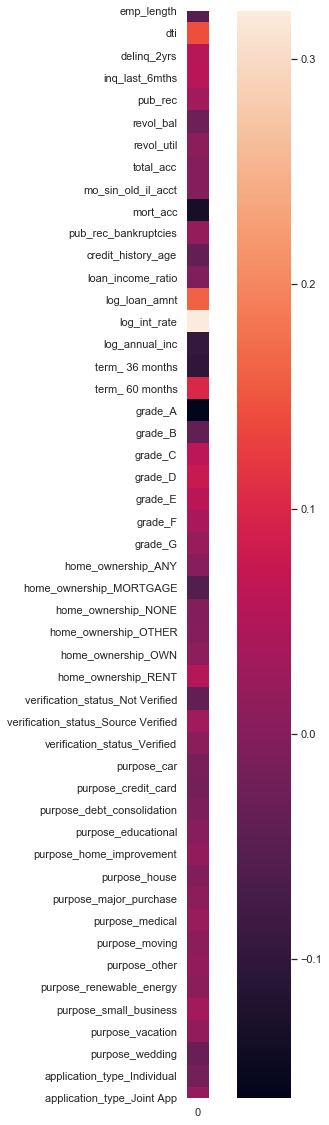

In [72]:
#Plotting heatmap with logistic regression coeffecients

plt.figure(figsize = (10,20))
import seaborn as sns
ax = sns.heatmap(
    coeffs.T,square=True
)

Based on the logistic regression results, the most important coeffecients are being contributed  by:
Positive: log_int_rate, log_loan_amnt, dti,
Negative: emp_length,mort_acc, log_annual_inc, term_36_months,grade_A, home_ownership_MORTGAGE,verification_status_Not verified

We have modelled out loan status as
1: Bad Loan
0: Good Loan
    
Based on the logistic regression coffecients
1. log_int_rate
2. log_loan_amnt
3. dti  ( Debt to income ratio)
have the best contribution to determining whether a loan will default.Let us understand the goodness of fit using the logistic regression from statsmodel library.

In [77]:
# Summary of logistic regression using statsmodel library
logit_model=sm.Logit(y3_train,X3_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.481403
         Iterations 7
                                         Results: Logit
Model:                        Logit                       Pseudo R-squared:          0.090      
Dependent Variable:           loan_status_binary          AIC:                       968411.0716
Date:                         2019-12-07 18:16            BIC:                       968943.0267
No. Observations:             1005729                     Log-Likelihood:            -4.8416e+05
Df Model:                     44                          LL-Null:                   -5.3184e+05
Df Residuals:                 1005684                     LLR p-value:               0.0000     
Converged:                    1.0000                      Scale:                     1.0000     
No. Iterations:               7.0000                                                            
------------------------------------------------------------------

The logistic regression model has a poor pesudo-R squared value ( McFadden's R squared) and this suggests that the model which was built has a poor fit.

Regardless of the R-squared, the significant coefficients still represent the mean change in the response for one unit of change in the predictor while holding other predictors in the model constant. 

From the logistic model from statsmodel we understand that apart from the loan grades:
1. log_int_rate
2. log_loan_amnt
3. purpose_small_business
4. home_ownership_RENT                  
have the best contribution to determining whether a loan will default

Let us check if this is the same if we restrict the data to a particular purpose. From our earlier data analysis small business loans had a high chance of default compared to the rest.

In [78]:
# Filtering ou records where purpose is small business
X3_train_smallbusiness= X3_train[X3_train['purpose_small_business']==1]
y3_train_smallbusiness=y3_train[X3_train['purpose_small_business']==1]

In [79]:
#dropping the other purpose columns
X3_train_smallbusiness.drop(columns=['purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],inplace=True)

In [80]:
X3_train_smallbusiness.drop(columns=['home_ownership_NONE'],inplace=True)

In [81]:
# Summary of logistic regression using statsmodel library
logit_model=sm.Logit(y3_train_smallbusiness,X3_train_smallbusiness)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.585060
         Iterations 7
                                          Results: Logit
Model:                        Logit                        Pseudo R-squared:           0.069      
Dependent Variable:           loan_status_binary           AIC:                        13780.4979 
Date:                         2019-12-07 18:16             BIC:                        14008.9491 
No. Observations:             11724                        Log-Likelihood:             -6859.2    
Df Model:                     30                           LL-Null:                    -7366.9    
Df Residuals:                 11693                        LLR p-value:                3.0494e-194
Converged:                    1.0000                       Scale:                      1.0000     
No. Iterations:               7.0000                                                              
-------------------------------------------------

There doesnot appear to be any difference in results and the goodness of fit is still minimal which suggests a lack of complete explanation in variance the target variable- loan status and the loan features available.

We shall now user the feature importance function in the sklearn to determine the relevant features which will be ranked.

### Decision Tree

In [90]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=20,
                              random_state=0)
forest.fit(scaled_X3_train, y3_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(scaled_X3_train.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], X3_train.columns[f], importances[indices[f]]))

Feature ranking:
1. feature 14 emp_length (0.081782)
2. feature 1 dti (0.069484)
3. feature 11 delinq_2yrs (0.067596)
4. feature 12 inq_last_6mths (0.067453)
5. feature 6 pub_rec (0.066446)
6. feature 8 revol_bal (0.066345)
7. feature 5 revol_util (0.065926)
8. feature 15 total_acc (0.065515)
9. feature 7 mo_sin_old_il_acct (0.064974)
10. feature 13 mort_acc (0.064016)
11. feature 0 pub_rec_bankruptcies (0.047967)
12. feature 9 credit_history_age (0.040441)
13. feature 3 loan_income_ratio (0.038980)
14. feature 2 log_loan_amnt (0.030164)
15. feature 4 log_int_rate (0.018923)
16. feature 18 log_annual_inc (0.013767)
17. feature 10 term_ 36 months (0.012769)
18. feature 17 term_ 60 months (0.011929)
19. feature 16 grade_A (0.010677)
20. feature 36 grade_B (0.010199)
21. feature 35 grade_C (0.008176)
22. feature 19 grade_D (0.007410)
23. feature 33 grade_E (0.005573)
24. feature 32 grade_F (0.005197)
25. feature 43 grade_G (0.004963)
26. feature 38 home_ownership_ANY (0.004880)
27. featur

Finally let us test using the best performing model during cross valdiation based on on F1 score ie Naive Bayes.

### Naive Bayes

In [89]:
#Modelling using Naive bayes
y3_train_np=y3_train.to_numpy()
y3_test_np=y3_test.to_numpy()
gnb = GaussianNB().fit(scaled_X3_train, y3_train_np.reshape(-1, 1)) 
gnb_predictions = gnb.predict(scaled_X3_test) 
print(classification_report(y3_test_np, gnb_predictions))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81    260986
           1       0.38      0.43      0.40     74258

    accuracy                           0.72    335244
   macro avg       0.61      0.62      0.61    335244
weighted avg       0.73      0.72      0.72    335244



As expected looks like Naive Bayes has performed the best and has F1 score of 0.40 for the defaults. 

### Feature selection using Lasso regularization on Logistic Regression
Regularization consists of adding a penalty to the different parameters of the machine learning model to avoid overfitting. From the different types of regularisation, LASSO (Least Absolute Shrinkage and Selection Operator) or L1 has the property that is able to shrink some of the coefficients to zero and thus determine the most important features.

In [91]:
# L1 regularization with threshold value 1.25 median
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), '1.25*median')
embeded_lr_selector.fit(scaled_X3_train_pd, y3_train)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False,
                threshold='1.25*median')

In [92]:
#Array of selected value by L1 regularization
embeded_lr_selector.get_support()

array([ True,  True,  True,  True,  True, False, False, False, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False,  True,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False,  True])

True is for the features that lasso thought is important (non-zero features) while False is for the features whose weights were shrinked to zero and are not important according to Lasso

In [93]:
selected_feat = scaled_X3_train_pd.columns[(embeded_lr_selector.get_support())]
print('total features: {}'.format((scaled_X3_train_pd.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 50
selected features: 21


Here are the most relevant features after lasso regularization:

In [94]:
X3_train.columns[embeded_lr_selector.get_support()]

Index(['emp_length', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec',
       'mort_acc', 'credit_history_age', 'log_loan_amnt', 'log_int_rate',
       'log_annual_inc', 'term_ 36 months', 'term_ 60 months', 'grade_A',
       'grade_B', 'grade_C', 'home_ownership_MORTGAGE', 'home_ownership_RENT',
       'verification_status_Not Verified', 'purpose_small_business',
       'purpose_wedding', 'application_type_Joint App'],
      dtype='object')

### Based on feature importance understood so far modelling again

In [95]:
selected_columns=['emp_length', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec',
       'mort_acc', 'credit_history_age', 'log_loan_amnt', 'log_int_rate',
       'log_annual_inc', 'term_ 36 months', 'term_ 60 months', 'grade_A',
       'grade_B', 'grade_C', 'home_ownership_MORTGAGE', 'home_ownership_RENT',
       'verification_status_Not Verified', 'purpose_small_business',
       'purpose_wedding', 'application_type_Joint App']

In [101]:
#Modelling using Gaussian Naive Bayes based on selected features
gnb = GaussianNB().fit(scaled_X3_train_pd[selected_columns], y3_train_np.reshape(-1, 1)) 
gnb_predictions = gnb.predict(scaled_X3_test_pd[selected_columns]) 
print(classification_report(y3_test_np, gnb_predictions))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80    260986
           1       0.37      0.47      0.41     74258

    accuracy                           0.70    335244
   macro avg       0.60      0.62      0.61    335244
weighted avg       0.73      0.70      0.72    335244



Naive Bayes F1 score for default value '1' has improved from 40 to 41 after feature selection. 

Our focus has been only on the relevance of the features and possiblity of modelling rather than actually modelling itself. If the latter was the focus, then hyper parameter tuning as well as oversampling of minority classes using techniques like SMOTE to better train based on the imbalanced dataset could have been employed to create a better model.

### Dimensionality reduction using PCA

Principal Component Analysis (PCA) is a unsupervised dimensionality-reduction technique that can be used to
reduce a large set of variables to a small set that still contains most of the information in the large set.

[6.96526008e-02 6.31168952e-02 4.22818972e-02 3.62168243e-02
 3.34798105e-02 3.26858247e-02 3.03468029e-02 2.87048561e-02
 2.71124576e-02 2.63169332e-02 2.54113239e-02 2.39812148e-02
 2.37211074e-02 2.20904966e-02 2.16305984e-02 2.10737026e-02
 2.05870967e-02 2.03713598e-02 2.00516032e-02 1.99816326e-02
 1.99132068e-02 1.98534347e-02 1.97831505e-02 1.97356428e-02
 1.96750485e-02 1.96230344e-02 1.96073572e-02 1.95861793e-02
 1.95415926e-02 1.94804784e-02 1.92568233e-02 1.91584220e-02
 1.86335492e-02 1.81739126e-02 1.79886769e-02 1.73185353e-02
 1.49322558e-02 1.25824488e-02 1.20428908e-02 1.10214115e-02
 1.01801902e-02 8.75338873e-03 6.94402058e-03 6.36010513e-03
 1.03920562e-03 4.70686690e-32 2.54283670e-32 1.68259864e-32
 2.44572034e-33 1.36592364e-33 5.79056376e-34]


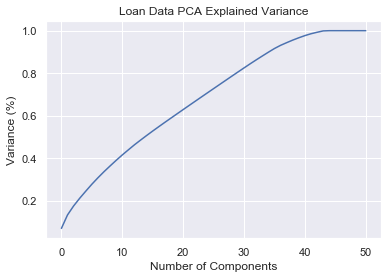

In [231]:
pca = PCA()

# We first fit a PCA model to the data
#pca.fit(scaled_X1_train)
pca.fit(scaled_X3_train)

print(pca.explained_variance_ratio_)


#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Loan Data PCA Explained Variance')
plt.show()

The dataset had 50 features. With 30 components we can explain the variance of around 80% and with 40 almost 100% of the variance. Thus we have been successful in reducing the dimensionality of the data set by finding a new set of variables (i.e., principal components), smaller than the original set of variables.

In [232]:
pca = PCA(n_components=2)

# We first fit a PCA model to the data
pca.fit(scaled_X3_train)

print(pca.explained_variance_ratio_)

[0.06965256 0.06311687]


This implies that the features cannot be combined as expected and we were optimistic of the ability.

Let us take a smaller sample to determine the loadings

In [109]:
X5_train, X5_test, y5_train, y5_test = train_test_split(loans_features_with_logs, loan_status_binary, random_state = 101,stratify=loan_status_binary,train_size=0.001)
scaled_X5_train = scaler.fit_transform(X5_train);

(1340, 50)


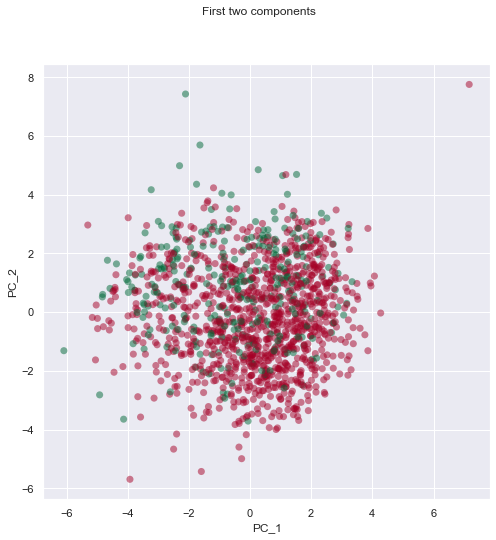

In [116]:
pca = PCA()
# We first fit a PCA model to the data
#pca.fit(scaled_X1_train)
pca.fit(scaled_X5_train)
loans_projected = pca.transform(scaled_X5_train)
print(scaled_X5_train.shape)
plt.figure(figsize=(8,8))
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(loans_projected[:,0], loans_projected[:,1], c = y5_train ,cmap = plt.cm.RdYlGn,s = 50, alpha = 0.5, linewidth=0)

Here we can see that there is very poor seperability of the two classes with the first two components. This can be explained by the low explained variance for them. Linear discrimoinant analysis is an alternative supervised model for dimensionality reduction but is used primarily for multi class problems( more than 2 classes).

In [341]:
column_names = np.asarray(sample_loans.columns.values)
pc_1_loadings = np.asarray(pca.components_[0])[np.argsort( np.abs(pca.components_[0]))[::-1]][0:10]
pc_1_names = np.asarray(column_names)[np.argsort( np.abs(pca.components_[0]))[::-1]][0:10]

for i in range(0, 10):
    print ( "Column \"" , pc_1_names[i] , "\" has a loading of: ", pc_1_loadings[i])

Column " term_ 36 months " has a loading of:  -0.3776045560060846
Column " term_ 60 months " has a loading of:  0.3776045560060846
Column " log_int_rate " has a loading of:  0.3185049719909129
Column " log_loan_amnt " has a loading of:  0.2756214396233632
Column " total_acc " has a loading of:  0.2171578735149145
Column " mort_acc " has a loading of:  0.21039623836876628
Column " home_ownership_MORTGAGE " has a loading of:  0.1931843945657132
Column " log_annual_inc " has a loading of:  0.19068383070930423
Column " grade_A " has a loading of:  -0.1883461436739749
Column " home_ownership_RENT " has a loading of:  -0.18411715688642105


In [342]:
pc_2_loadings = np.asarray(pca.components_[1])[np.argsort( np.abs(pca.components_[1]))[::-1]][0:10]
pc_2_names = np.asarray(column_names)[np.argsort( np.abs(pca.components_[1]))[::-1]][0:10]

for i in range(0, 10):
    print ( "Column \"" , pc_2_names[i] , "\" has a loading of: ", pc_2_loadings[i])

Column " log_int_rate " has a loading of:  -0.3633460682038757
Column " home_ownership_MORTGAGE " has a loading of:  0.3398967169214345
Column " mort_acc " has a loading of:  0.30341279718261777
Column " grade_A " has a loading of:  0.30156709230074474
Column " log_annual_inc " has a loading of:  0.2989680641254619
Column " home_ownership_RENT " has a loading of:  -0.2923341552928655
Column " credit_history_age " has a loading of:  0.255383215929399
Column " total_acc " has a loading of:  0.2282611779275372
Column " mo_sin_old_il_acct " has a loading of:  0.1782953838485641
Column " grade_E " has a loading of:  -0.1606655191975573


Using PCA the interpretability is lost if we rely on the individual components but the loadings in the components influence the strength the variable has on the model. Here we can see that the loan terms, log_int_rate, log_loan_amnt and number of mortgage account have a huge influence.

In [ ]:
Summarising the top 3 important features influencing loan status identifed:
    1. Logistic Regression: 
            a. log_int_rate
            b. log_loan_amnt
            c. dti 
    2. Decision Tree:
            a. emp_length
            b. dti
            c. delinq_2yrs
    3. PCA
            a. loan term
            b. log_int_rate
            c. log_loan_amnt
    4. Lasso regularization has selected 21 features among the 50 that influence loan status:
        'emp_length', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec',
       'mort_acc', 'credit_history_age', 'log_loan_amnt', 'log_int_rate',
       'log_annual_inc', 'term_ 36 months', 'term_ 60 months', 'grade_A',
       'grade_B', 'grade_C', 'home_ownership_MORTGAGE', 'home_ownership_RENT',
       'verification_status_Not Verified', 'purpose_small_business',
       'purpose_wedding', 'application_type_Joint App'

## Interest Rate
We are attempting to explain the variance of interest rate based on the loan data features which are available before the loan is processed by Lending club. Thus we can try to explain the features which have the best predictive possiblity for interest rates. We had earlier converted interest rate to logarithmic scale to make it a normal distribution. 

In [131]:
model2 = sm.formula.ols(formula='log_int_rate ~ emp_length+ dti+ delinq_2yrs+ inq_last_6mths+ pub_rec+revol_bal+ revol_util+ total_acc+ mo_sin_old_il_acct+mort_acc+ pub_rec_bankruptcies+ credit_history_age+loan_income_ratio+ log_loan_amnt+ log_annual_inc+ home_ownership_ANY+home_ownership_MORTGAGE+ home_ownership_NONE+ home_ownership_OTHER+ home_ownership_OWN+ home_ownership_RENT+purpose_car+ purpose_credit_card+ purpose_debt_consolidation+purpose_educational+ purpose_home_improvement+ purpose_house+purpose_major_purchase+ purpose_medical+ purpose_moving+purpose_other+ purpose_renewable_energy+ purpose_small_business+purpose_vacation+ purpose_wedding', data=scaled_X3_train_pd, hasconst = False)
results2 = model2.fit()
print ("Params 2: ", results2.summary())
print ("---------------------------------------------")

Params 2:                                   OLS Regression Results                                
Dep. Variable:           log_int_rate   R-squared (uncentered):                   0.271
Model:                            OLS   Adj. R-squared (uncentered):              0.271
Method:                 Least Squares   F-statistic:                          1.097e+04
Date:                Tue, 10 Dec 2019   Prob (F-statistic):                        0.00
Time:                        05:27:43   Log-Likelihood:                     -1.2684e+06
No. Observations:             1005729   AIC:                                  2.537e+06
Df Residuals:                 1005695   BIC:                                  2.537e+06
Df Model:                          34                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------

Here the regression results have a R2 of 0.271 which is relatively poor, but is much better than the loan status goodness of fit which we explored earlier. 

inq_last_6mths, revol_util, log_loan_amnt, purpose_other contributes the highest  to interest rates in increasing it while credit_history_age,log_annual_inc, purpose_credit_card contributes the highest in decreasing it.  Knowledge of this can help borrowers in helping to explain their interest rates which Lending club has determined.                                      

Let us try predicting for the test dataset based on the model we just built for using the training dataset.

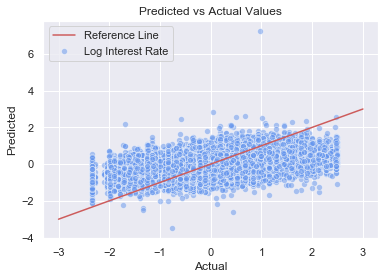

In [134]:
sample_int = scaled_X3_test_pd.sample(frac=0.1, replace=False, random_state=100)
sns.scatterplot(sample_int.log_int_rate, results2.predict(sample_int), color='cornflowerblue', alpha=.5, label='Log Interest Rate')
plt.plot([-3, 3], [-3, 3], color='indianred', label='Reference Line')
plt.xlabel('Actual'), plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.legend()

Based on the predicted v/s actual values we can see that the predictions poorly estimates the values at both extremes, which the middle values are satisfactory. This may suggest that we can explore a non-linear relationship.

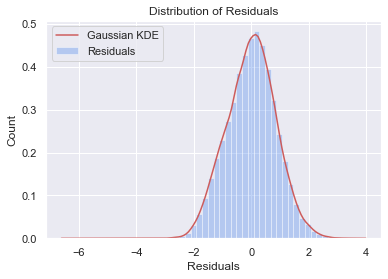

In [135]:
sns.distplot(sample_int.log_int_rate-results2.predict(sample_int),
             hist_kws={'color':'cornflowerblue', 'label':'Residuals'}, 
             kde_kws={'color':'indianred', 'label':'Gaussian KDE'})
plt.xlabel('Residuals'), plt.ylabel('Count')
plt.title('Distribution of Residuals')
plt.legend()

The residuals are normally distributed.

## Reflections and Future Work

Based on our study, Lending Club can vision a tool for borrowers to evaluate their loan profile, before making a formal request for a loan to understand their chances of having it granted and explaining the infleuncers. Borrowers can also understand the factors that influence the interest rate. A formal application for a loan usually affects the user’s credit score. The intelligence gained though this analysis can be used to build this new tool benefitting them without affecting their credit score. 

Our study can also benefit investors. Currently most rely on the loan grade alone to decide to invest. Investment asset selection is both art and science. With our study we have laid the foundation for loan investment selection without relying on loan grades by assessing the important features, but this needs more data to substantiate and finally compare with the loan grades

Not always can we reliably model a phenomenon using data. Usually, occurrences that are a proxy for human behavior are difficult to predict compared to natural processes or system behavior like interest rate. https://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-a-regression-model-with-low-r-squared-and-low-p-values

Modeling loan status is tantamount to understanding human behavior as people can default on a loan despite having the means to pay for it and people may still pay in full and on time despite having high debt to income ratio and a history of delinquencies. Probably there isn’t a pattern. More data attributes/features to analyze may help to understand the behavior. Alternatively, segmenting the population first based on certain parameters can be used to model their repayment behavior as behaviour within a smaller segment of population has a higher chance of being similar compared to others. As a result, there may be different set of important features for each segment.

## References
1. https://www.lendingclub.com/
2. https://www.kaggle.com/wendykan/lending-club-loan-data There are solutions available mainly for prediction. My solution walks through the entire end to end data science process and focuses on feature importance and relevance.
3. https://towardsdatascience.com/a-look-into-feature-importance-in-logistic-regression-models-a4aa970f9b0f
4. https://towardsdatascience.com/feature-engineering-using-machine-learning-on-large-financial-datasets-8584dacd3a4d
5. https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
6. https://www.lendingmemo.com/lending-club-prosper-default-rates/
7. https://www.experian.com/blogs/insights/2019/05/state-of-credit-2018-2/
8. Zhou, J., Li, W., Wang, J., Ding, S. and Xia, C. (2019). Default prediction in P2P lending from high-dimensional data based on machine learning. Physica A: Statistical Mechanics and its Applications
9. Hu, Rongcai & Liu, Meng & He, Pingping & Ma, Yong. (2019). Can Investors on P2P Lending Platforms Identify Default Risk?. International Journal of Electronic Commerce. 23. 63-84. 10.1080/10864415.2018.1512279. 
10. All lectures and lab feedback for INM430 Principles of Data Science

In [1]:
import io
import os
from nbformat import current

total_markdown = 0
total_heading = 0
total_code = 0

for root, dirs, files in os.walk("."):
    for file in files:
        if file.endswith(".ipynb") and not file.endswith("checkpoint.ipynb") :
            #print(os.path.join(root, file))
            with io.open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                nb = current.read(f, 'json')

            word_count_markdown = 0
            word_count_heading = 0
            word_count_code = 0
            for cell in nb.worksheets[0].cells:
                if cell.cell_type == "markdown":
                    word_count_markdown += len(cell['source'].replace('#', '').lstrip().split(' '))
                elif cell.cell_type == "heading":
                    word_count_heading += len(cell['source'].replace('#', '').lstrip().split(' '))
                elif cell.cell_type == "code":
                    word_count_code += len(cell['input'].replace('#', '').lstrip().split(' '))
            total_markdown += word_count_markdown
            total_heading += word_count_heading
            total_code += word_count_code

print("{} Words in notebooks' markdown" .format(total_markdown))
print("{} Words in notebooks' heading" .format(total_heading))
print("{} Words in notebooks' code" .format(total_code))

C:\Users\aaj21\AppData\Local\Continuum\anaconda3\lib\site-packages\nbformat\current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


4095 Words in notebooks' markdown
198 Words in notebooks' heading
3004 Words in notebooks' code
